## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower
import matplotlib as mpl

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from pandas.plotting import parallel_coordinates

## LOAD DATASET

In [5]:
df = pd.read_csv('ikea.csv')

In [7]:
df.head()

Unnamed: 0   item_id                   name       category   price  \
0           0  90420332               FREKVENS  Bar furniture   265.0   
1           1    368814              NORDVIKEN  Bar furniture   995.0   
2           2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   
3           3  80155205                   STIG  Bar furniture    69.0   
4           4  30180504                NORBERG  Bar furniture   225.0   

      old_price  sellable_online  \
0  No old price             True   
1  No old price            False   
2  No old price            False   
3  No old price             True   
4  No old price             True   

                                                link other_colors  \
0  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...           No   
1  https://www.ikea.com/sa/en/p/nordviken-bar-tab...           No   
2  https://www.ikea.com/sa/en/p/nordviken-nordvik...           No   
3  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...          Yes   
4  https://www.ikea.com/sa/en/p/norberg-wall-moun...           No   

                                   short_description              designer  \
0           Bar table, in/outdoor,          51x51 cm  Nicholai Wiig Hansen   
1                      Bar table,          140x80 cm     Francis Cayouette   
2                         Bar table and 4 bar stools     Francis Cayouette   
3            Bar stool with backrest,          74 cm         Henrik Preutz   
4          Wall-mounted drop-leaf table,         ...        Marcus Arvonen   

   depth  height  width  
0    NaN    99.0   51.0  
1    NaN   105.0   80.0  
2    NaN     NaN    NaN  
3   50.0   100.0   60.0  
4   60.0    43.0   74.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


**DATAFRAME EXPLANATION**
<br>

|       Column       |       Explanation       |
|--------------------|-------------------------|
|  `item_id`   | Item identification number  |
|  `name`       | The name of the product |
|  `category`      | The category of the product |
|  `price` | The price of the product [$] |
|  `old_price`     | The old price of the product [No old price/ SR 995 / Other |
|  `sellable_online`  | Whether or not the IKEA product is sellable online [True/False] |
| `link`     | A link to IKEA product [link] |
|  `other_colors`    | Other colors that the IKEA product is available in [Yes/No] |
|  `short_description` | A short description of the IKEA product |
|  `designer`   | The designer of the IKEA productd |
|  `depth` | The depth of the IKEA product |
|  `height`  | The height of the IKEA product |
| `width` | The width of the IKEA product |

## EXPLORATORY DATA ANALYSIS


### Data Cleaning

There is one column `Unnamed: 0` that doesn't represent anything, kind of redundancy with the **index**, so we can drop it. We also need to check is there any null and duplicated values.

In [11]:
# drop unused column

df = df.drop(['Unnamed: 0'], axis = 1)

In [13]:
# Count null values

df.isna().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [15]:
# Check if there any duplicated values

df.duplicated().sum()

0

In [21]:
# Check Rows and Columns with null values

#df[df[df.columns].isnull().any(1)]
# Get rows where any column has a null value
df_with_nulls = df[df.isnull().any(axis=1)]

# Display the rows with null values
df_with_nulls


item_id                   name       category   price     old_price  \
0     90420332               FREKVENS  Bar furniture   265.0  No old price   
1       368814              NORDVIKEN  Bar furniture   995.0  No old price   
2      9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0  No old price   
7     60155602                DALFRED  Bar furniture   195.0  No old price   
9     69304221    EKEDALEN / EKEDALEN  Bar furniture  2176.0      SR 2,375   
...        ...                    ...            ...     ...           ...   
3689  99157902                ELVARLI      Wardrobes   750.0        SR 820   
3690   9158152                ELVARLI      Wardrobes  1572.0      SR 1,755   
3691  59157541                ELVARLI      Wardrobes   924.0      SR 1,050   
3692  89157573                ELVARLI      Wardrobes  2745.0      SR 3,130   
3693  69157376                ELVARLI      Wardrobes  1231.0      SR 1,535   

      sellable_online                                               link  \
0                True  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...   
1               False  https://www.ikea.com/sa/en/p/nordviken-bar-tab...   
2               False  https://www.ikea.com/sa/en/p/nordviken-nordvik...   
7                True  https://www.ikea.com/sa/en/p/dalfred-bar-stool...   
9                True  https://www.ikea.com/sa/en/p/ekedalen-ekedalen...   
...               ...                                                ...   
3689             True  https://www.ikea.com/sa/en/p/elvarli-1-section...   
3690             True  https://www.ikea.com/sa/en/p/elvarli-2-section...   
3691             True  https://www.ikea.com/sa/en/p/elvarli-2-section...   
3692             True  https://www.ikea.com/sa/en/p/elvarli-3-section...   
3693             True  https://www.ikea.com/sa/en/p/elvarli-2-section...   

     other_colors                                 short_description  \
0              No          Bar table, in/outdoor,          51x51 cm   
1              No                     Bar table,          140x80 cm   
2              No                        Bar table and 4 bar stools   
7              No                      Bar stool,          63-74 cm   
9              No                        Bar table and 4 bar stools   
...           ...                                               ...   
3689           No              1 section,          92x51x222-350 cm   
3690           No            2 sections,          135x51x222-350 cm   
3691           No            2 sections,          175x51x222-350 cm   
3692           No            3 sections,          178x51x222-350 cm   
3693           No            2 sections,          175x51x222-350 cm   

                  designer  depth  height  width  
0     Nicholai Wiig Hansen    NaN    99.0   51.0  
1        Francis Cayouette    NaN   105.0   80.0  
2        Francis Cayouette    NaN     NaN    NaN  
7              Sarah Fager   50.0     NaN   50.0  
9          Ehlén Johansson    NaN     NaN    NaN  
...                    ...    ...     ...    ...  
3689       Ehlén Johansson   50.0     NaN   91.0  
3690       Ehlén Johansson   50.0     NaN  135.0  
3691       Ehlén Johansson   50.0     NaN  175.0  
3692       Ehlén Johansson   50.0     NaN  178.0  
3693       Ehlén Johansson   50.0     NaN  175.0  

[1795 rows x 13 columns]

In [23]:
# Count the median value for depth for each categories

median_depth = df.groupby(['category'])['depth'].median().reset_index()
median_depth.columns = ['category', 'MedianDepth']
median_depth

category  MedianDepth
0                          Bar furniture         47.0
1                                   Beds         88.0
2             Bookcases & shelving units         36.0
3                   Cabinets & cupboards         38.0
4                         Café furniture         46.5
5                                 Chairs         53.5
6       Chests of drawers & drawer units         47.0
7                   Children's furniture         45.0
8                      Nursery furniture         44.0
9                      Outdoor furniture         67.0
10                         Room dividers         39.0
11  Sideboards, buffets & console tables         40.0
12                     Sofas & armchairs         98.0
13                  TV & media furniture         40.0
14                        Tables & desks         46.0
15                              Trolleys         52.0
16                             Wardrobes         57.0

In [25]:
# Count the median value for height for each categories

median_height = df.groupby(['category'])['height'].median().reset_index()
median_height.columns = ['category', 'MedianHeight']
median_height

category  MedianHeight
0                          Bar furniture         102.0
1                                   Beds          84.0
2             Bookcases & shelving units         147.0
3                   Cabinets & cupboards         101.0
4                         Café furniture          77.5
5                                 Chairs          77.0
6       Chests of drawers & drawer units          73.0
7                   Children's furniture          67.0
8                      Nursery furniture          86.5
9                      Outdoor furniture          73.0
10                         Room dividers         147.0
11  Sideboards, buffets & console tables          92.0
12                     Sofas & armchairs          83.0
13                  TV & media furniture          64.0
14                        Tables & desks          74.0
15                              Trolleys          88.0
16                             Wardrobes         236.0

In [27]:
# Count the median value for width for each categories

median_width = df.groupby(['category'])['width'].median().reset_index()
median_width.columns = ['category', 'MedianWidth']
median_width

category  MedianWidth
0                          Bar furniture         48.0
1                                   Beds        140.0
2             Bookcases & shelving units         81.0
3                   Cabinets & cupboards         80.0
4                         Café furniture         53.0
5                                 Chairs         67.0
6       Chests of drawers & drawer units         67.0
7                   Children's furniture         56.0
8                      Nursery furniture         60.0
9                      Outdoor furniture         62.5
10                         Room dividers        147.0
11  Sideboards, buffets & console tables        120.0
12                     Sofas & armchairs        196.0
13                  TV & media furniture        120.0
14                        Tables & desks         75.0
15                              Trolleys         49.0
16                             Wardrobes        150.0

In [29]:
# Create new dataframe that contain the median for each dimensions, from each categories

median_size = pd.merge(pd.merge(median_depth,median_height,on='category'),median_width,on='category')
median_size

category  MedianDepth  MedianHeight  \
0                          Bar furniture         47.0         102.0   
1                                   Beds         88.0          84.0   
2             Bookcases & shelving units         36.0         147.0   
3                   Cabinets & cupboards         38.0         101.0   
4                         Café furniture         46.5          77.5   
5                                 Chairs         53.5          77.0   
6       Chests of drawers & drawer units         47.0          73.0   
7                   Children's furniture         45.0          67.0   
8                      Nursery furniture         44.0          86.5   
9                      Outdoor furniture         67.0          73.0   
10                         Room dividers         39.0         147.0   
11  Sideboards, buffets & console tables         40.0          92.0   
12                     Sofas & armchairs         98.0          83.0   
13                  TV & media furniture         40.0          64.0   
14                        Tables & desks         46.0          74.0   
15                              Trolleys         52.0          88.0   
16                             Wardrobes         57.0         236.0   

    MedianWidth  
0          48.0  
1         140.0  
2          81.0  
3          80.0  
4          53.0  
5          67.0  
6          67.0  
7          56.0  
8          60.0  
9          62.5  
10        147.0  
11        120.0  
12        196.0  
13        120.0  
14         75.0  
15         49.0  
16        150.0

In [31]:
# Merge the median dataframe with existing dataframe

df = pd.merge(df,median_size,on='category')
df

item_id                   name       category   price     old_price  \
0     90420332               FREKVENS  Bar furniture   265.0  No old price   
1       368814              NORDVIKEN  Bar furniture   995.0  No old price   
2      9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0  No old price   
3     80155205                   STIG  Bar furniture    69.0  No old price   
4     30180504                NORBERG  Bar furniture   225.0  No old price   
...        ...                    ...            ...     ...           ...   
3689  99157902                ELVARLI      Wardrobes   750.0        SR 820   
3690   9158152                ELVARLI      Wardrobes  1572.0      SR 1,755   
3691  59157541                ELVARLI      Wardrobes   924.0      SR 1,050   
3692  89157573                ELVARLI      Wardrobes  2745.0      SR 3,130   
3693  69157376                ELVARLI      Wardrobes  1231.0      SR 1,535   

      sellable_online                                               link  \
0                True  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...   
1               False  https://www.ikea.com/sa/en/p/nordviken-bar-tab...   
2               False  https://www.ikea.com/sa/en/p/nordviken-nordvik...   
3                True  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...   
4                True  https://www.ikea.com/sa/en/p/norberg-wall-moun...   
...               ...                                                ...   
3689             True  https://www.ikea.com/sa/en/p/elvarli-1-section...   
3690             True  https://www.ikea.com/sa/en/p/elvarli-2-section...   
3691             True  https://www.ikea.com/sa/en/p/elvarli-2-section...   
3692             True  https://www.ikea.com/sa/en/p/elvarli-3-section...   
3693             True  https://www.ikea.com/sa/en/p/elvarli-2-section...   

     other_colors                                  short_description  \
0              No           Bar table, in/outdoor,          51x51 cm   
1              No                      Bar table,          140x80 cm   
2              No                         Bar table and 4 bar stools   
3             Yes            Bar stool with backrest,          74 cm   
4              No          Wall-mounted drop-leaf table,         ...   
...           ...                                                ...   
3689           No               1 section,          92x51x222-350 cm   
3690           No             2 sections,          135x51x222-350 cm   
3691           No             2 sections,          175x51x222-350 cm   
3692           No             3 sections,          178x51x222-350 cm   
3693           No             2 sections,          175x51x222-350 cm   

                  designer  depth  height  width  MedianDepth  MedianHeight  \
0     Nicholai Wiig Hansen    NaN    99.0   51.0         47.0         102.0   
1        Francis Cayouette    NaN   105.0   80.0         47.0         102.0   
2        Francis Cayouette    NaN     NaN    NaN         47.0         102.0   
3            Henrik Preutz   50.0   100.0   60.0         47.0         102.0   
4           Marcus Arvonen   60.0    43.0   74.0         47.0         102.0   
...                    ...    ...     ...    ...          ...           ...   
3689       Ehlén Johansson   50.0     NaN   91.0         57.0         236.0   
3690       Ehlén Johansson   50.0     NaN  135.0         57.0         236.0   
3691       Ehlén Johansson   50.0     NaN  175.0         57.0         236.0   
3692       Ehlén Johansson   50.0     NaN  178.0         57.0         236.0   
3693       Ehlén Johansson   50.0     NaN  175.0         57.0         236.0   

      MedianWidth  
0            48.0  
1            48.0  
2            48.0  
3            48.0  
4            48.0  
...           ...  
3689        150.0  
3690        150.0  
3691        150.0  
3692        150.0  
3693        150.0  

[3694 rows x 16 columns]

In [33]:
# Fill the null values in depth column, with the median value of depth

df['depth'] = df['depth'].fillna(df['MedianDepth'])

In [35]:
# Fill the null values in height column, with the median value of height

df['height'] = df['height'].fillna(df['MedianHeight'])

In [37]:
# Fill the null values in width column, with the median value of width

df['width'] = df['width'].fillna(df['MedianWidth'])

In [39]:
# Let's check it again!

df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
MedianDepth          0
MedianHeight         0
MedianWidth          0
dtype: int64

In [41]:
# Drop the Median Columns

df.drop(['MedianDepth', 'MedianHeight', 'MedianWidth'], 
        axis= 'columns', inplace = True)

Calculate the volume of product based on it size

In [43]:
# create new column volume
df['volume'] = df['depth'] * df['height'] * df['width']

In [45]:
# Check the dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              3694 non-null   float64
 11  height             3694 non-null   float64
 12  width              3694 non-null   float64
 13  volume             3694 non-null   float64
dtypes: bool(1), float64(5), int64(1), object(7)
memory usage: 378.9+ KB


`old_price` has a wrong type of data, let's change it from **object / string** to **float**, so it can have the same data type as `price`.

In [48]:
# Find out the value in old_price column

df['old_price'].values

array(['No old price', 'No old price', 'No old price', ..., 'SR 1,050',
       'SR 3,130', 'SR 1,535'], dtype=object)

In [51]:
# Create the fix_old_price function

def fix_old_price(df):
    
    # fill in price to old_price for No old price
    if df['old_price']  == 'No old price':
        return df['price']

    # remove SR and , from old_price
    elif df['old_price'][-4:] != 'pack':
        return float(str(df['old_price'])[3:].replace(',',''))
        
    else:
        return np.nan

# create new column price_diff, to help identified is there any different 
# between price with old_price
df['price_diff'] = (df['old_price'] != 'No old price').astype(int)

# apply the function
df['old_price'] = df.apply(fix_old_price, axis=1)
df[['price', 'old_price']].head()


price  old_price
0   265.0      265.0
1   995.0      995.0
2  2095.0     2095.0
3    69.0       69.0
4   225.0      225.0

In [53]:
# Re-check for null values

df.isna().sum()

item_id               0
name                  0
category              0
price                 0
old_price            10
sellable_online       0
link                  0
other_colors          0
short_description     0
designer              0
depth                 0
height                0
width                 0
volume                0
price_diff            0
dtype: int64

In [55]:
# Fill the old_price column with null values with price

df['old_price'] = df['old_price'].fillna(df['price'])

In [57]:
# Create column to calculate the different amount between price and old_price

df['diff_amount'] = df['old_price'] - df['price']

In [59]:
# Check it again!

df.isna().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
volume               0
price_diff           0
diff_amount          0
dtype: int64

In [61]:
df.head()

item_id                   name       category   price  old_price  \
0  90420332               FREKVENS  Bar furniture   265.0      265.0   
1    368814              NORDVIKEN  Bar furniture   995.0      995.0   
2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0     2095.0   
3  80155205                   STIG  Bar furniture    69.0       69.0   
4  30180504                NORBERG  Bar furniture   225.0      225.0   

   sellable_online                                               link  \
0             True  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...   
1            False  https://www.ikea.com/sa/en/p/nordviken-bar-tab...   
2            False  https://www.ikea.com/sa/en/p/nordviken-nordvik...   
3             True  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...   
4             True  https://www.ikea.com/sa/en/p/norberg-wall-moun...   

  other_colors                                  short_description  \
0           No           Bar table, in/outdoor,          51x51 cm   
1           No                      Bar table,          140x80 cm   
2           No                         Bar table and 4 bar stools   
3          Yes            Bar stool with backrest,          74 cm   
4           No          Wall-mounted drop-leaf table,         ...   

               designer  depth  height  width    volume  price_diff  \
0  Nicholai Wiig Hansen   47.0    99.0   51.0  237303.0           0   
1     Francis Cayouette   47.0   105.0   80.0  394800.0           0   
2     Francis Cayouette   47.0   102.0   48.0  230112.0           0   
3         Henrik Preutz   50.0   100.0   60.0  300000.0           0   
4        Marcus Arvonen   60.0    43.0   74.0  190920.0           0   

   diff_amount  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   float64
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              3694 non-null   float64
 11  height             3694 non-null   float64
 12  width              3694 non-null   float64
 13  volume             3694 non-null   float64
 14  price_diff         3694 non-null   int32  
 15  diff_amount        3694 non-null   float64
dtypes: bool(1), float64(7), 

### Correlation and Descriptive Statistic

In [70]:
# correlation heatmap

#df.corr()

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = df_numeric.corr()

# Show the correlation matrix
print(correlation_matrix)


              item_id     price  old_price     depth    height     width  \
item_id      1.000000  0.062683   0.063291  0.013912  0.042289  0.047008   
price        0.062683  1.000000   0.993867  0.435003  0.229950  0.602747   
old_price    0.063291  0.993867   1.000000  0.441311  0.227645  0.608017   
depth        0.013912  0.435003   0.441311  1.000000 -0.077826  0.460812   
height       0.042289  0.229950   0.227645 -0.077826  1.000000  0.332318   
width        0.047008  0.602747   0.608017  0.460812  0.332318  1.000000   
volume       0.051491  0.648516   0.650187  0.621798  0.482914  0.827089   
price_diff   0.040748  0.095033   0.160414  0.090364  0.085591  0.137429   
diff_amount  0.030468  0.352013   0.453362  0.229094  0.073381  0.288071   

               volume  price_diff  diff_amount  
item_id      0.051491    0.040748     0.030468  
price        0.648516    0.095033     0.352013  
old_price    0.650187    0.160414     0.453362  
depth        0.621798    0.090364     0.229

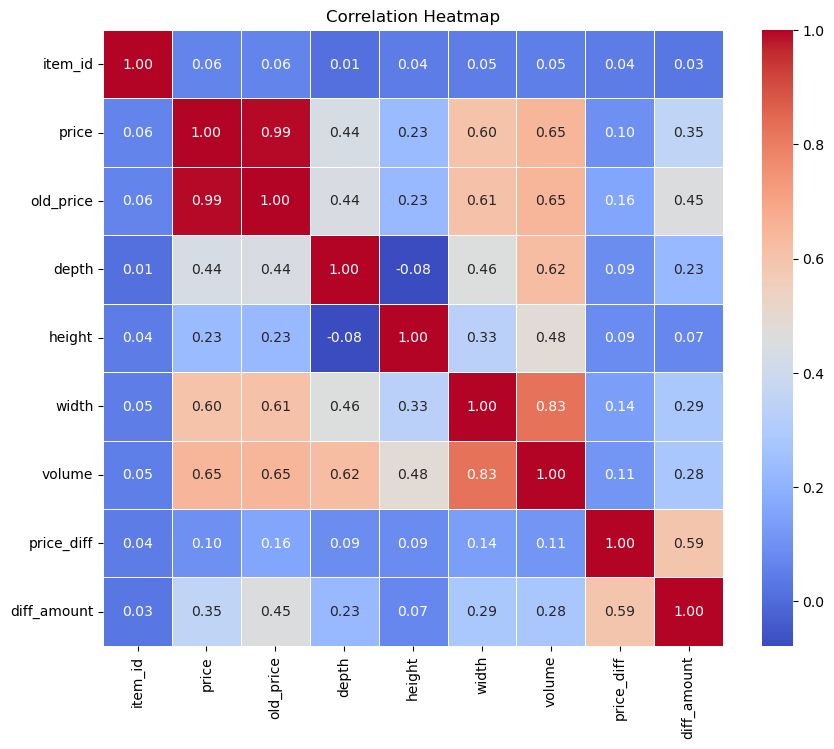

In [72]:
#correlation = df.corr()
#sns.heatmap(correlation, annot=True, fmt='.2f')

# (fig. 1)
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [76]:
# Convert categorical columns to numeric (if applicable)
df['CategoryColumn'] = df['CategoryColumn'].astype('category').cat.codes


KeyError: 'CategoryColumn'

`price` and `old_price` has higher correlation with `width` rather than two other dimension unit [ `depth` and `height` ], and both `price` and `old_price` are highly correlated with each others and obviously with `price_diff`. 

From three types of product dimension, `volume` has highest correlation with `width`, followed with `depth` then `height`. `volume` also correlated with `price` and `old_price`

We will drop some column that can create **multicolinearity**, later for modelling purposes.

In [74]:
# Let's do Descriptive Statistics with the dataframe

df.describe()

item_id        price    old_price        depth       height  \
count  3.694000e+03  3694.000000  3694.000000  3694.000000  3694.000000   
mean   4.863240e+07  1078.208419  1125.014348    55.880211    98.524228   
std    2.888709e+07  1374.652494  1443.543124    26.683012    55.201894   
min    5.848700e+04     3.000000     3.000000     1.000000     1.000000   
25%    2.039057e+07   180.900000   195.000000    40.000000    73.000000   
50%    4.928808e+07   544.700000   550.000000    46.500000    80.000000   
75%    7.040357e+07  1429.500000  1495.000000    65.000000   105.000000   
max    9.993262e+07  9585.000000  9985.000000   257.000000   700.000000   

             width        volume   price_diff  diff_amount  
count  3694.000000  3.694000e+03  3694.000000  3694.000000  
mean    105.420953  7.058127e+05     0.177044    46.805929  
std      68.800229  9.146756e+05     0.381757   170.552565  
min       1.000000  4.000000e+01     0.000000     0.000000  
25%      60.000000  2.042400e+05     0.000000     0.000000  
50%      80.000000  3.072000e+05     0.000000     0.000000  
75%     141.000000  8.640000e+05     0.000000     0.000000  
max     420.000000  1.362900e+07     1.000000  1997.000000

**Conclusion:**


1.   `price_diff` is boolean with [0] for not a no different between `price` and `old_price` or it is a new product, and [1] if the value between`price` and `old_price` is different.
2.   All the other variables are bigger than the median except `item_id`.



### Exploratory Data Analysis [ EDA ]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   float64
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              3694 non-null   float64
 11  height             3694 non-null   float64
 12  width              3694 non-null   float64
 13  volume             3694 non-null   float64
 14  price_diff         3694 non-null   int32  
 15  diff_amount        3694 non-null   float64
dtypes: bool(1), float64(7), 

In [80]:
# creating numerical dataframe : df_numericals

df_numericals = df.drop(labels = ['name','category','link', 'other_colors', 
                                  'designer', 'sellable_online', 'short_description'], axis = 1)
df_numericals.head()

item_id   price  old_price  depth  height  width    volume  price_diff  \
0  90420332   265.0      265.0   47.0    99.0   51.0  237303.0           0   
1    368814   995.0      995.0   47.0   105.0   80.0  394800.0           0   
2   9333523  2095.0     2095.0   47.0   102.0   48.0  230112.0           0   
3  80155205    69.0       69.0   50.0   100.0   60.0  300000.0           0   
4  30180504   225.0      225.0   60.0    43.0   74.0  190920.0           0   

   diff_amount  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [82]:
# creating categorical dataframe : df_categoricals

df_categoricals = df.drop(labels = ['item_id','depth','height', 'width', 
                                    'volume', 'price_diff', 'price', 
                                    'old_price', 'diff_amount'], axis = 1)
df_categoricals.head()

name       category  sellable_online  \
0               FREKVENS  Bar furniture             True   
1              NORDVIKEN  Bar furniture            False   
2  NORDVIKEN / NORDVIKEN  Bar furniture            False   
3                   STIG  Bar furniture             True   
4                NORBERG  Bar furniture             True   

                                                link other_colors  \
0  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...           No   
1  https://www.ikea.com/sa/en/p/nordviken-bar-tab...           No   
2  https://www.ikea.com/sa/en/p/nordviken-nordvik...           No   
3  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...          Yes   
4  https://www.ikea.com/sa/en/p/norberg-wall-moun...           No   

                                   short_description              designer  
0           Bar table, in/outdoor,          51x51 cm  Nicholai Wiig Hansen  
1                      Bar table,          140x80 cm     Francis Cayouette  
2                         Bar table and 4 bar stools     Francis Cayouette  
3            Bar stool with backrest,          74 cm         Henrik Preutz  
4          Wall-mounted drop-leaf table,         ...        Marcus Arvonen

### Univariate Analysis

#### Visualizing the Distribution Plot for Each Dimensions and Price

C:\Users\devar\AppData\Local\Temp\ipykernel_30136\1927465791.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_numericals['depth'], color='#7209b7')
C:\Users\devar\AppData\Local\Temp\ipykernel_30136\1927465791.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_numericals['height'], 

<function matplotlib.pyplot.show(close=None, block=None)>

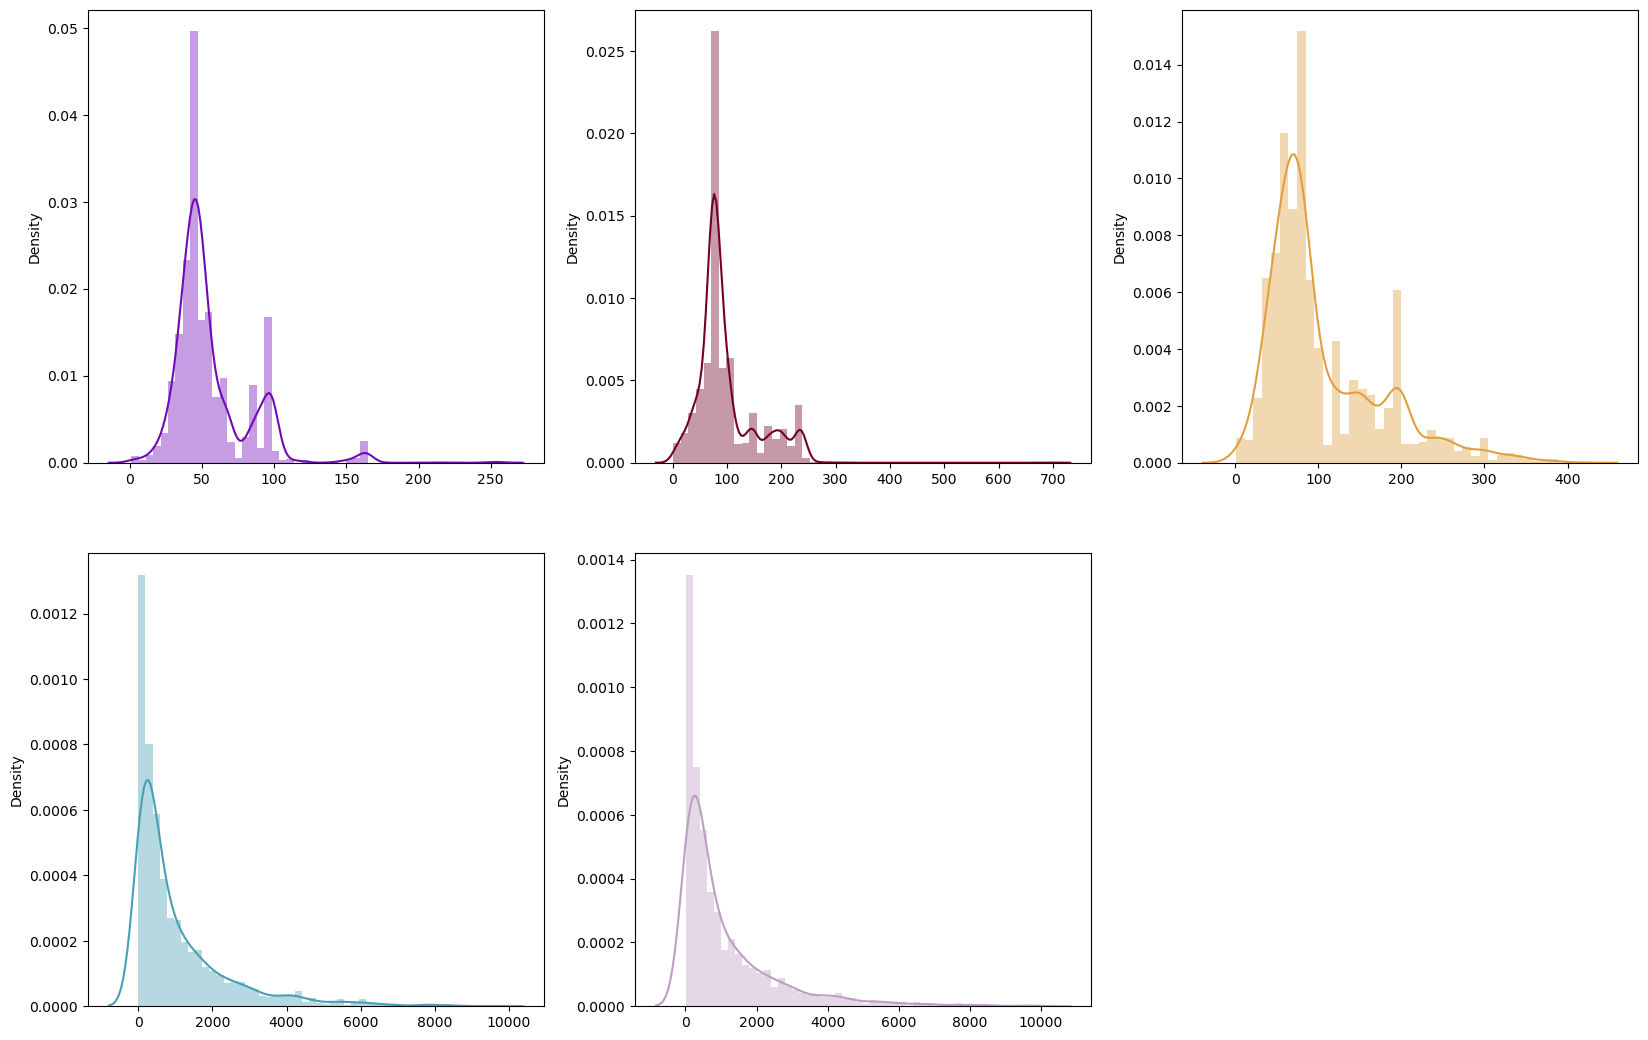

In [86]:
# Visualize the distribution plot

plt.figure(figsize = (20,20))

plt.subplot(3, 3, 1)
sns.distplot(x=df_numericals['depth'], color='#7209b7')

plt.subplot(3, 3, 2)
sns.distplot(x=df_numericals['height'], color='#720026')

plt.subplot(3, 3, 3)
sns.distplot(x=df_numericals['width'], color='#e09f3e')

plt.subplot(3, 3, 4)
sns.distplot(x=df_numericals['price'], color='#489fb5')

plt.subplot(3, 3, 5)
sns.distplot(x=df_numericals['old_price'], color='#bc9ec1')

plt.show

# (fig. 2-6)

**Explanation:**

As we can see, from **fig. 2-6**, are skewed to the right, which means the **mean** is greater than the **median**, and dominated with product with lower price, and smaller size.

#### Proportion Between Online and Offline Sales

Here we try to analyze the proportion between online and offline sales.

In [90]:
# count the value from sellable_online

df.sellable_online.value_counts()

sellable_online
True     3666
False      28
Name: count, dtype: int64

In [92]:
# Create new dataframe df_online

df_online = pd.DataFrame({'Sellable Online': ['True', 'False'],
                          'Total': [3666, 28]})
df_online

Sellable Online  Total
0            True   3666
1           False     28

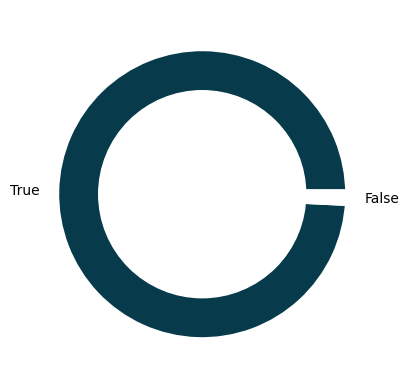

In [94]:
# Visualizing the df_online dataframe with donut

# Define data
names = df_online['Sellable Online']
size = df_online['Total']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, colors=['#073b4c','#ffd166'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# (fig. 7)

#### Product With More Than 1 Color

In [97]:
# count the value from other_colors

df.other_colors.value_counts()

other_colors
No     2182
Yes    1512
Name: count, dtype: int64

In [99]:
# Create new dataframe df_color

df_color = pd.DataFrame({'other_colors': ['No', 'Yes'],
                          'Total': [2182, 1512]})
df_color

other_colors  Total
0           No   2182
1          Yes   1512

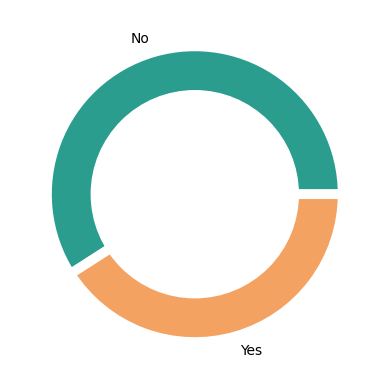

In [101]:
# Define data
names = df_color['other_colors']
size = df_color['Total']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, colors=['#2a9d8f','#f4a261'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# (fig. 8)

#### Price Different Proportion

In [104]:
# count the value of [Yes/No] from price_diff

df.price_diff.value_counts()

price_diff
0    3040
1     654
Name: count, dtype: int64

In [106]:
# Create new dataframe df_price

df_price = pd.DataFrame({'Price Different': ['No', 'Yes'],
                          'Total': [3040, 654]})
df_price

Price Different  Total
0              No   3040
1             Yes    654

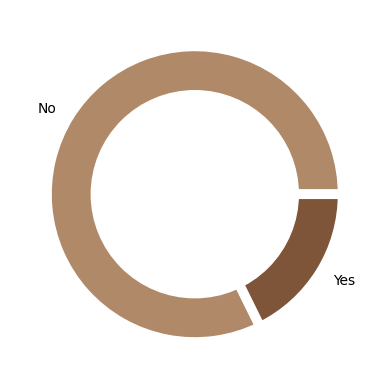

In [108]:
# Define data
names = df_price['Price Different']
size = df_price['Total']

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names, colors=['#b08968','#7f5539'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# (fig. 9)

#### IKEA Product Categories 

In [111]:
# Create new dataframe short the category

top_cat = (df_categoricals
            .groupby('category') 
            .agg(count=('category', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            )
top_cat

category  count
14                        Tables & desks    612
2             Bookcases & shelving units    548
5                                 Chairs    481
12                     Sofas & armchairs    428
3                   Cabinets & cupboards    292
16                             Wardrobes    236
9                      Outdoor furniture    216
1                                   Beds    208
13                  TV & media furniture    190
6       Chests of drawers & drawer units    125
7                   Children's furniture    124
8                      Nursery furniture     97
0                          Bar furniture     47
15                              Trolleys     28
4                         Café furniture     26
11  Sideboards, buffets & console tables     23
10                         Room dividers     13

In [113]:
# set the angle

ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(top_cat), endpoint=False)

In [115]:
# define Sell

COUNT = top_cat['count'].values

In [117]:
# define name

CAT = top_cat["category"].values

In [119]:
# Prepare the graph (1)

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#84a98c","#52796f","#354f52","#2f3e46"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=COUNT.min(), vmax=COUNT.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(COUNT))

Text(0.5, 0.025, '(fig. 10) Data Visualisation of IKEA Product Categories')

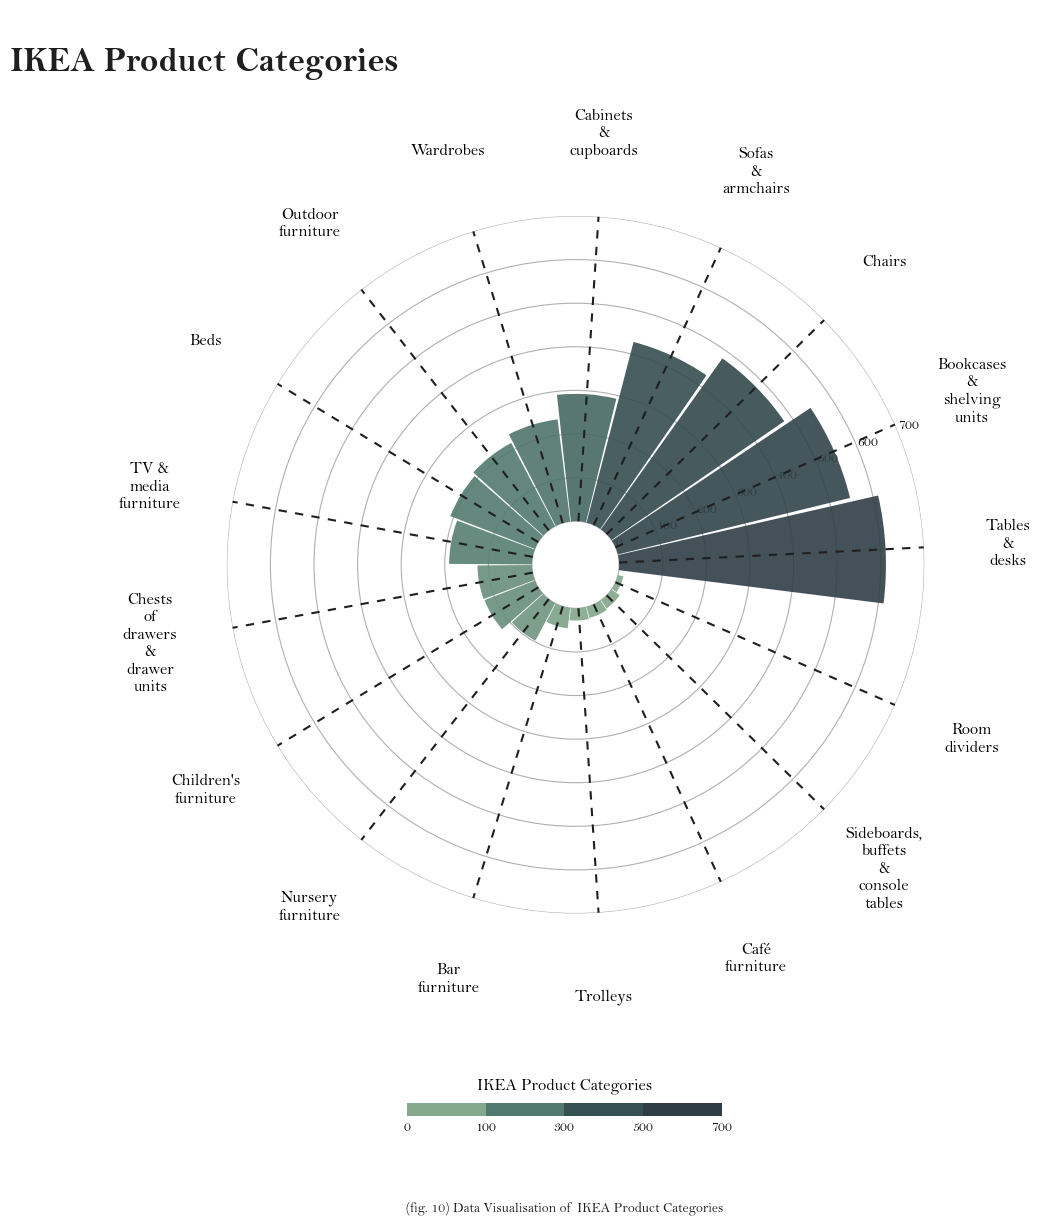

In [121]:
# Prepare the graph (2) - Customize

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

#set axis
ax.set_ylim(-100, 700)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.35, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

CAT = ["\n".join(wrap(r, 5, break_long_words=False)) for r in CAT]
CAT

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(CAT, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add extra space for the labels
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(50)

# Add legend
# Add extra space for legend
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 100, 300, 500, 700]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 100, 300, 500, 700]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("IKEA Product Categories", size=12, labelpad=-40)

# Add annotations 
# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.9)

# Define title, subtitle, and caption
title = "\nIKEA Product Categories"

caption = "(fig. 10) Data Visualisation of IKEA Product Categories"

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="center", va="baseline")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline")

Text(0.5, 0.025, '(fig. 10) Data Visualisation of IKEA Product Categories')

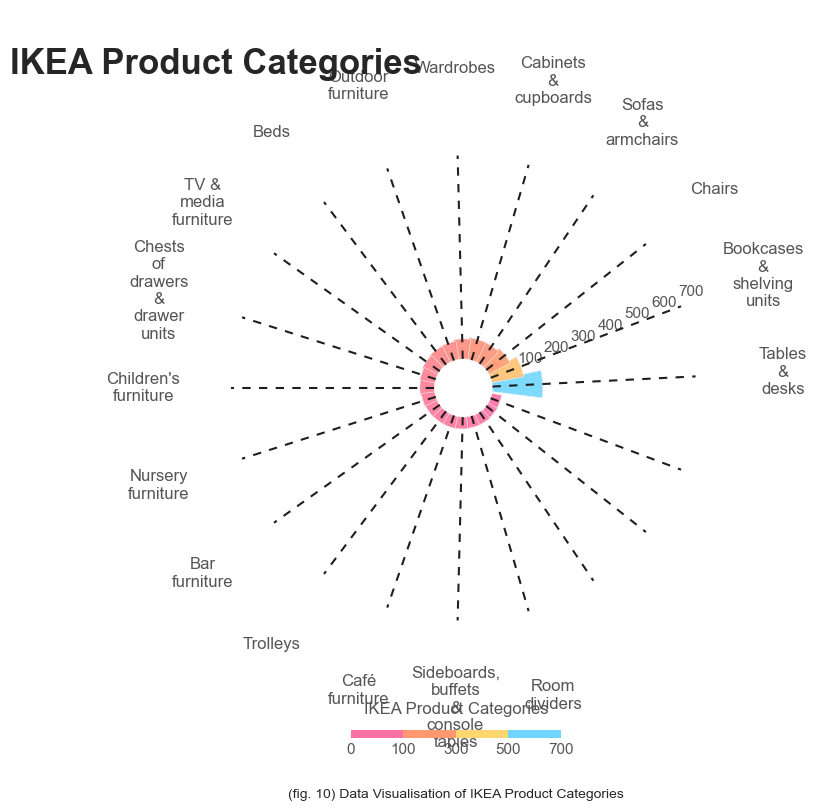

In [551]:
# Prepare the graph (2) - Customize

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(6, 8), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

#set axis
ax.set_ylim(-100, 700)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.35, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

CAT = ["\n".join(wrap(r, 5, break_long_words=False)) for r in CAT]
CAT

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(CAT, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add extra space for the labels
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(50)

# Add legend
# Add extra space for legend
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 100, 300, 500, 700]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 100, 300, 500, 700]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("IKEA Product Categories", size=12, labelpad=-40)

# Add annotations 
# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.9)

# Define title, subtitle, and caption
title = "\nIKEA Product Categories"

caption = "(fig. 10) Data Visualisation of IKEA Product Categories"

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="center", va="baseline")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline")

#### IKEA Designer

In [124]:
# Create new dataframe short the designer

top_des = (df_categoricals
            .groupby('designer') 
            .agg(count=('designer', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            .head(20)
            )
top_des

designer  count
192                  IKEA of Sweden    828
138                 Ehlén Johansson    161
163               Francis Cayouette    151
344                    Ola Wihlborg    134
279             K Hagberg/M Hagberg    122
270                    Jon Karlsson    120
145  Ehlén Johansson/IKEA of Sweden     75
110                    Carina Bengs     75
209  IKEA of Sweden/Ehlén Johansson     70
189                   Henrik Preutz     70
366               Studio Copenhagen     64
185          H Preutz/A Fredriksson     60
133                 Ebba Strandmark     57
289   K Malmvall/E Lilja Löwenhielm     55
335                   Nike Karlsson     53
153            Eva Lilja Löwenhielm     46
259                     Johan Kroon     31
377                  Tord Björklund     31
310                  Marcus Arvonen     28
114                   Carl Öjerstam     28

In [126]:
# set the angle

ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(top_des), endpoint=False)

In [128]:
# define Sell

COUNT = top_des['count'].values

In [130]:
# define name

DES = top_des["designer"].values

In [132]:
# Prepare the graph (1)

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#f07167","#fed9b7","#fdfcdc","#0081a7"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=COUNT.min(), vmax=COUNT.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(COUNT))

Text(0.5, 0.025, '(fig. 11) Data Visualisation of IKEA Top Designers')

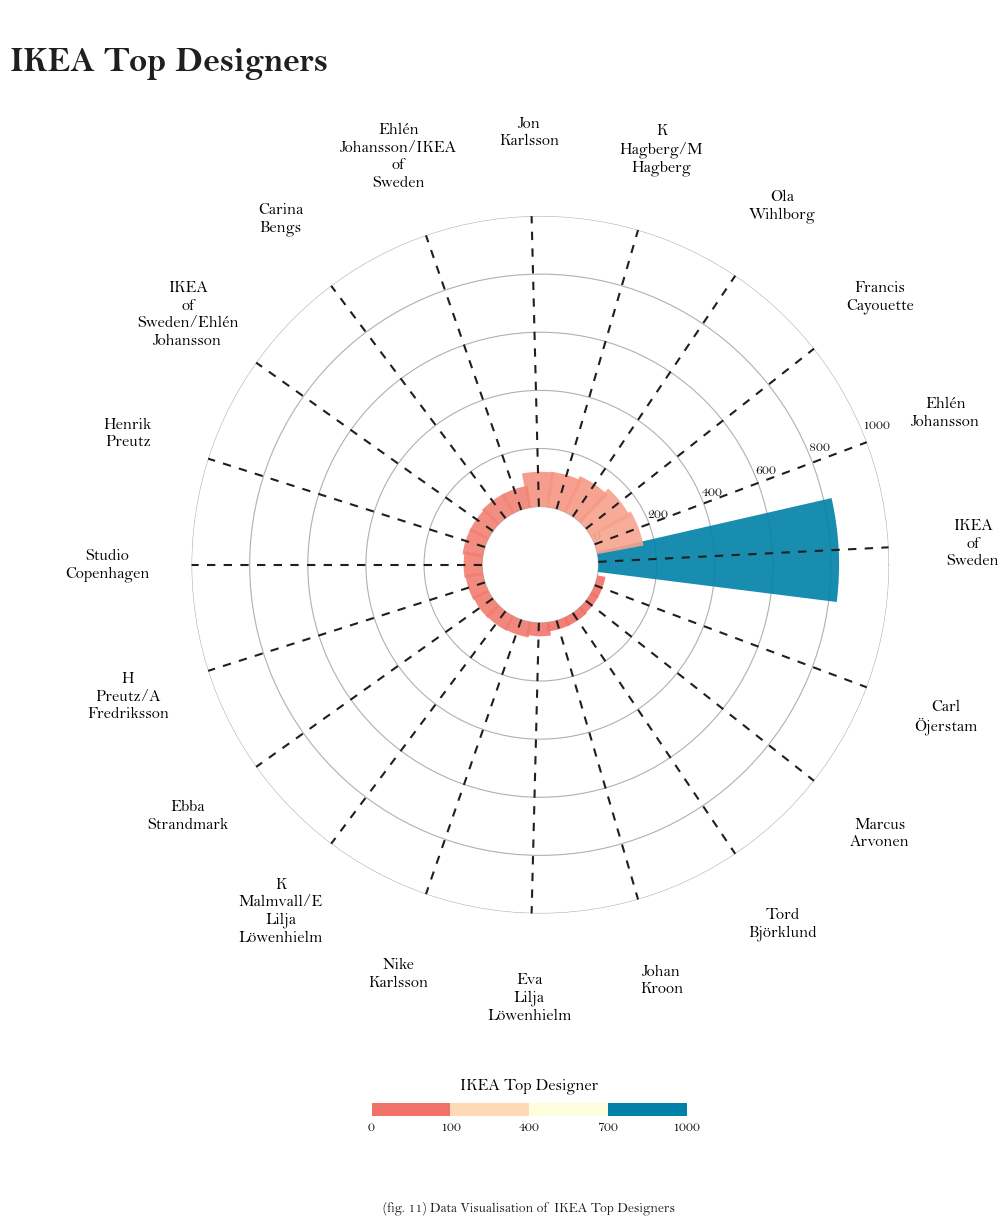

In [134]:
# Prepare the graph (2) - Customize

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

#set axis
ax.set_ylim(-200, 1000)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.35, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

DES = ["\n".join(wrap(r, 5, break_long_words=False)) for r in DES]
DES

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(DES, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add extra space for the labels
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(50)

# Add legend
# Add extra space for legend
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 100, 400, 700, 1000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 100, 400, 700, 1000]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("IKEA Top Designer", size=12, labelpad=-40)

# Add annotations 
# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.9)

# Define title, subtitle, and caption
title = "\nIKEA Top Designers"

caption = "(fig. 11) Data Visualisation of IKEA Top Designers"

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="center", va="baseline")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline")

#### IKEA Best Seller

In [137]:
# Create new dataframe short the designer

top_sel = (df_categoricals
            .groupby('name') 
            .agg(count=('name', 'count'))
            .reset_index()
            .sort_values('count',ascending=False)
            .head(20)
            )
top_sel

name  count
30             BESTÅ    173
412              PAX    111
163          GRÖNLID     83
22            BEKANT     74
545          TROFAST     74
216             IVAR     69
578            VIMLE     63
95              EKET     61
431           PLATSA     57
279          LIDHULT     52
219          JONAXEL     50
385           NORDLI     46
175           HAVSTA     44
504  STUVA / FRITIDS     42
180           HEMNES     42
99           ELVARLI     41
224           KALLAX     39
563       VALLENTUNA     38
6              ALGOT     36
596          ÄPPLARÖ     34

In [139]:
# set the angle

ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(top_sel), endpoint=False)

In [141]:
# define Sell

COUNT = top_sel['count'].values

In [143]:
# define name

SEL = top_sel["name"].values

In [145]:
# Prepare the graph (1)

GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#ff70a6","#ff9770","#ffd670","#70d6ff"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=COUNT.min(), vmax=COUNT.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(COUNT))

Text(0.5, 0.025, '(fig. 12) Data Visualisation of IKEA Top Product')

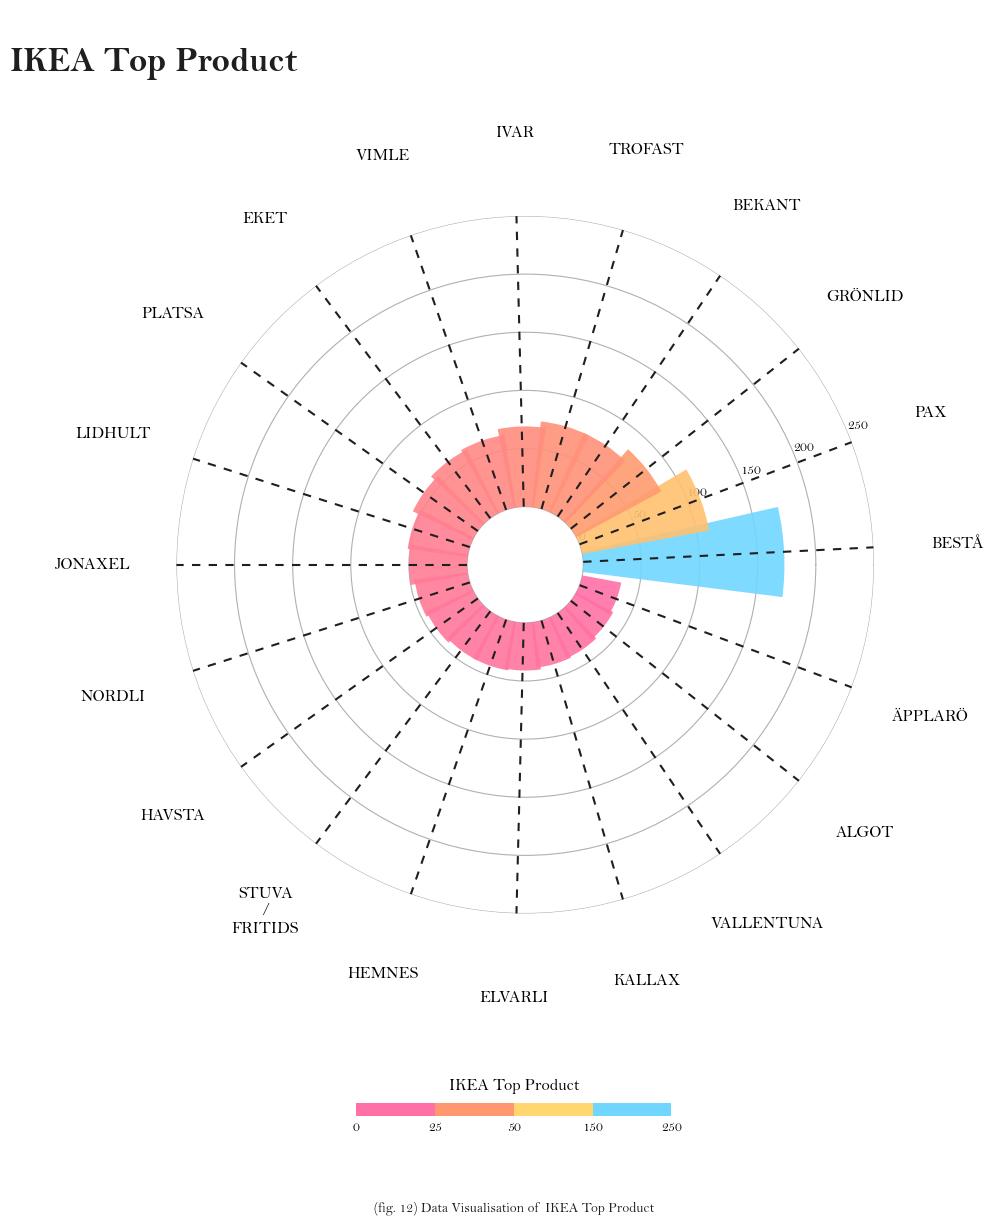

In [147]:
# Prepare the graph (2) - Customize

# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

#set axis
ax.set_ylim(-50, 250)

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, COUNT, color=COLORS, alpha=0.9, width=0.35, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

DES = ["\n".join(wrap(r, 5, break_long_words=False)) for r in SEL]
DES

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(DES, size=12);

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Add extra space for the labels
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(50)

# Add legend
# Add extra space for legend
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 25, 50, 150, 250]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 25, 50, 150, 250]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("IKEA Top Product", size=12, labelpad=-40)

# Add annotations 
# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.9)

# Define title, subtitle, and caption
title = "\nIKEA Top Product"

caption = "(fig. 12) Data Visualisation of IKEA Top Product"

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="center", va="baseline")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline")

### Bivariate Analysis

In [150]:
df.head()

item_id                   name       category   price  old_price  \
0  90420332               FREKVENS  Bar furniture   265.0      265.0   
1    368814              NORDVIKEN  Bar furniture   995.0      995.0   
2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0     2095.0   
3  80155205                   STIG  Bar furniture    69.0       69.0   
4  30180504                NORBERG  Bar furniture   225.0      225.0   

   sellable_online                                               link  \
0             True  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...   
1            False  https://www.ikea.com/sa/en/p/nordviken-bar-tab...   
2            False  https://www.ikea.com/sa/en/p/nordviken-nordvik...   
3             True  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...   
4             True  https://www.ikea.com/sa/en/p/norberg-wall-moun...   

  other_colors                                  short_description  \
0           No           Bar table, in/outdoor,          51x51 cm   
1           No                      Bar table,          140x80 cm   
2           No                         Bar table and 4 bar stools   
3          Yes            Bar stool with backrest,          74 cm   
4           No          Wall-mounted drop-leaf table,         ...   

               designer  depth  height  width    volume  price_diff  \
0  Nicholai Wiig Hansen   47.0    99.0   51.0  237303.0           0   
1     Francis Cayouette   47.0   105.0   80.0  394800.0           0   
2     Francis Cayouette   47.0   102.0   48.0  230112.0           0   
3         Henrik Preutz   50.0   100.0   60.0  300000.0           0   
4        Marcus Arvonen   60.0    43.0   74.0  190920.0           0   

   diff_amount  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

#### Visualizing `price` vs `old_price`

<Axes: xlabel='old_price', ylabel='price'>

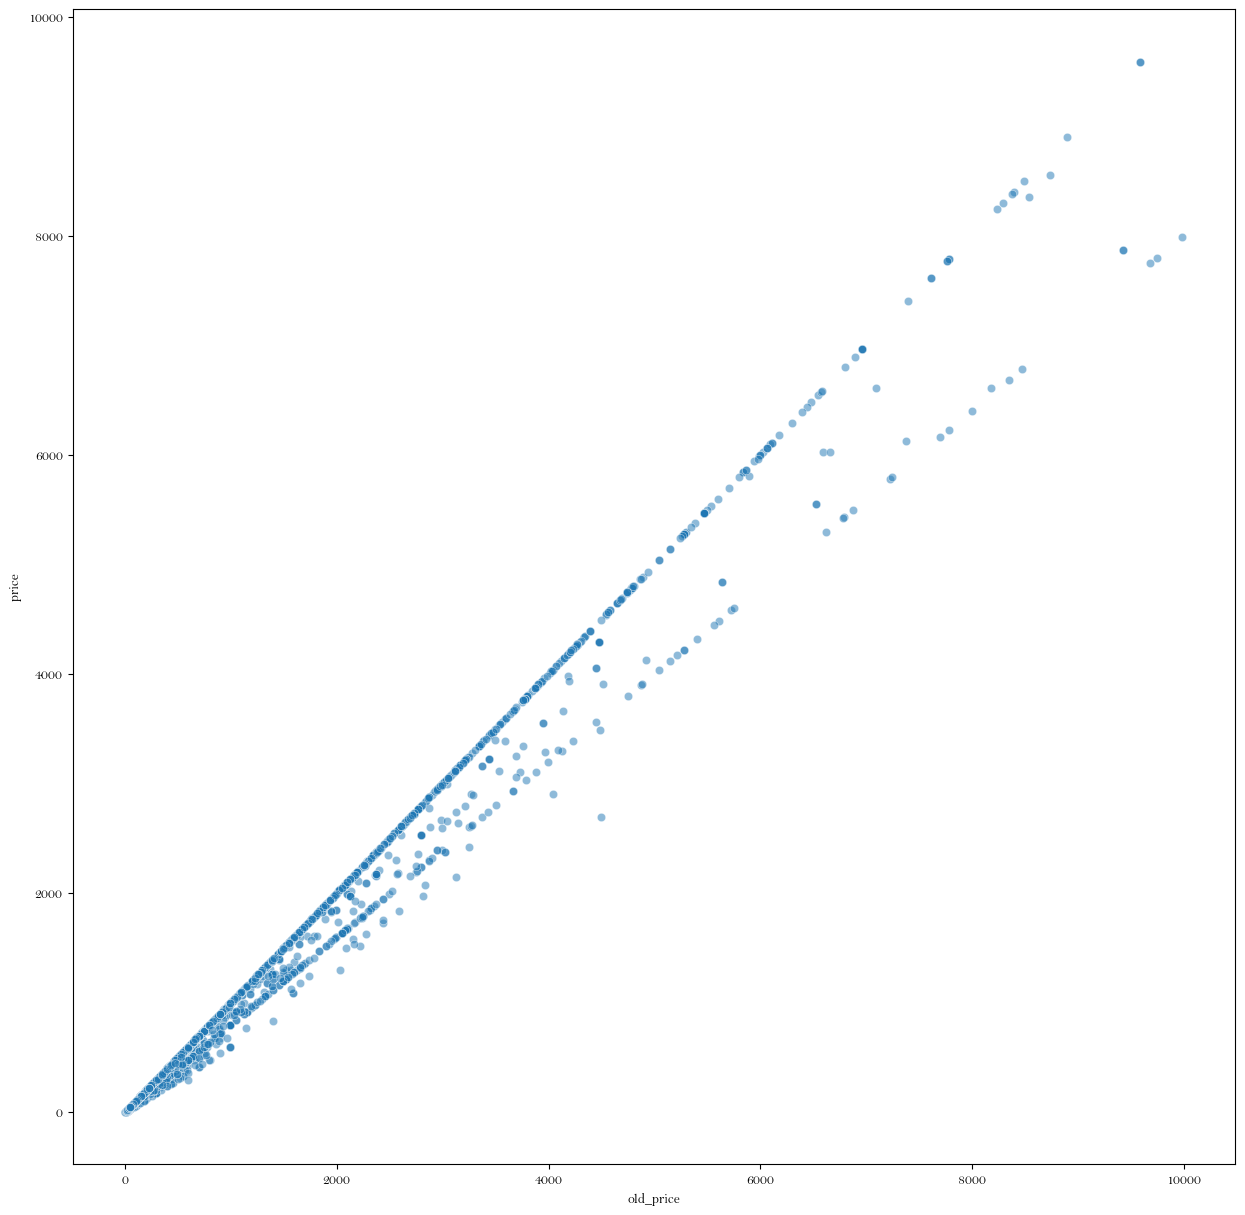

In [153]:
# Create the scatterplot

plt.figure(figsize = (15,15))

sns.scatterplot(data=df, x="old_price", y="price", alpha = 0.5)

# (fig. 13)

There are linear connection between `price` and `old_price`, the higher the `price` the value of `old_price` also increase.

#### Visualizing `volume` [ the size of product ] vs `price`

<Axes: xlabel='volume', ylabel='price'>

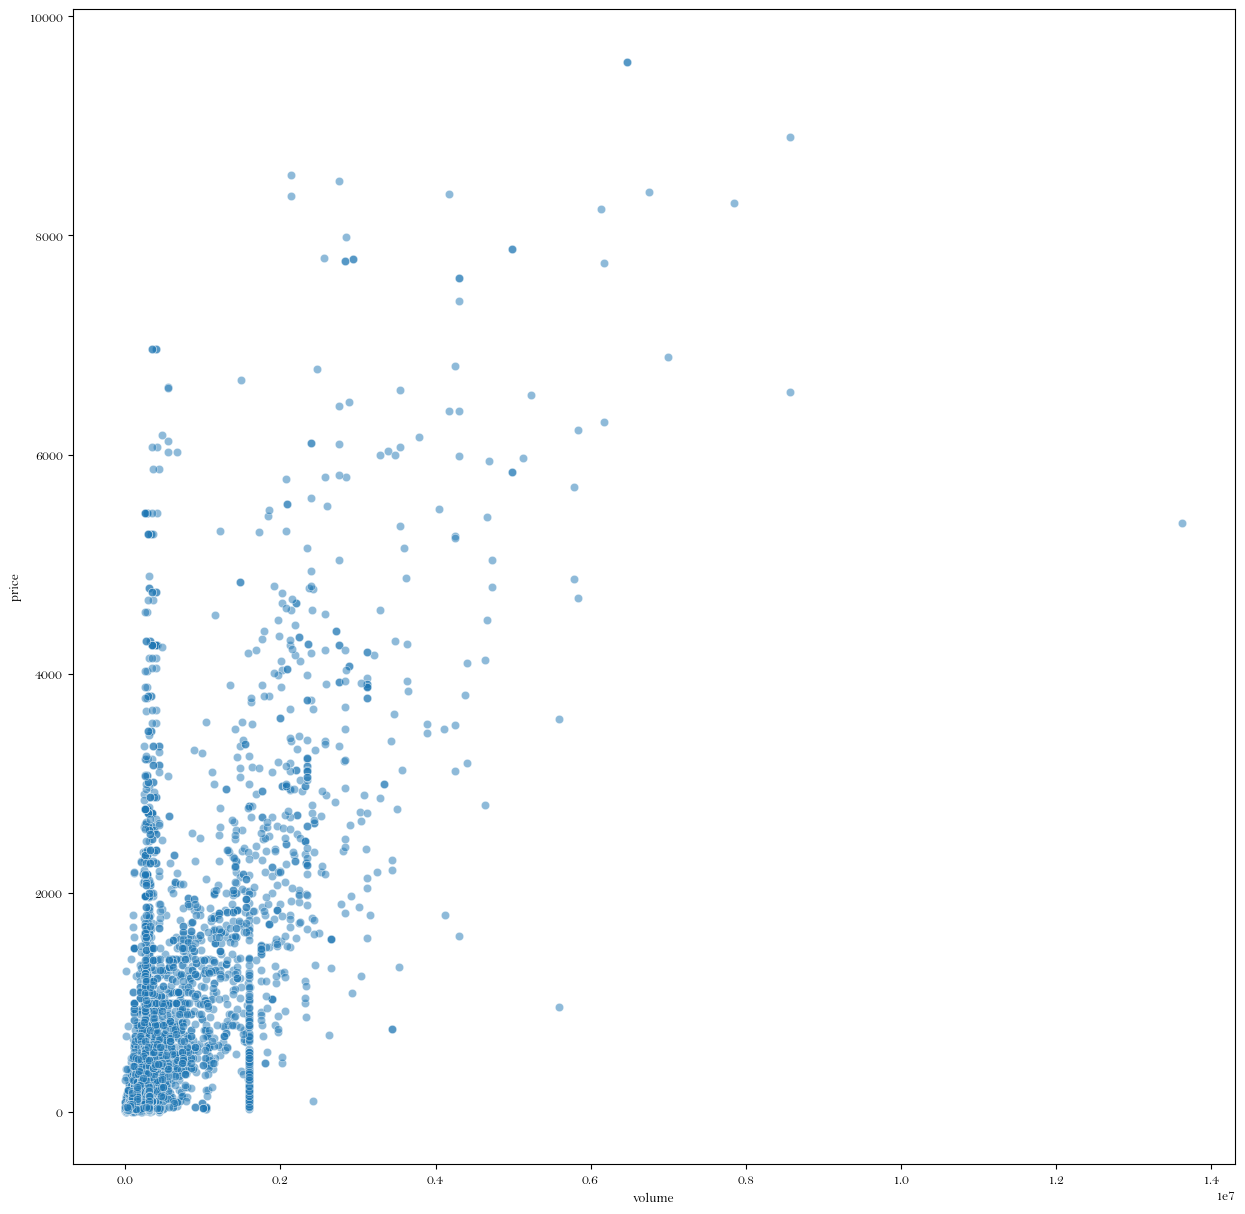

In [157]:
# Scatterplot

plt.figure(figsize = (15,15))

sns.scatterplot(data=df, x="volume", y="price", alpha = 0.5)

# (fig. 15)

Based on above chart, product sold in IKEA is are dominated with small volume product with low price range.

#### Visualizing the `price` vs `category`

In [161]:
# Create new dataframe category and price

cat_price = (df.groupby(['category'])['price'] 
            .agg(np.mean)
            .reset_index()
            .sort_values('price', ascending=False)
            )
cat_price

C:\Users\devar\AppData\Local\Temp\ipykernel_30136\1994192969.py:4: FutureWarning: The provided callable <function mean at 0x0000024EF9B7EAC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean)


category        price
16                             Wardrobes  2162.141949
12                     Sofas & armchairs  2004.016355
1                                   Beds  1647.432692
14                        Tables & desks  1129.395425
11  Sideboards, buffets & console tables  1068.086957
5                                 Chairs  1048.932640
10                         Room dividers   932.000000
9                      Outdoor furniture   859.826852
3                   Cabinets & cupboards   789.015753
0                          Bar furniture   679.553191
15                              Trolleys   678.517857
13                  TV & media furniture   659.050526
6       Chests of drawers & drawer units   612.180000
4                         Café furniture   553.884615
2             Bookcases & shelving units   519.416058
8                      Nursery furniture   393.659794
7                   Children's furniture   272.758065

In [163]:
cat_price['price'].mean()

941.756984154427

<function matplotlib.pyplot.show(close=None, block=None)>

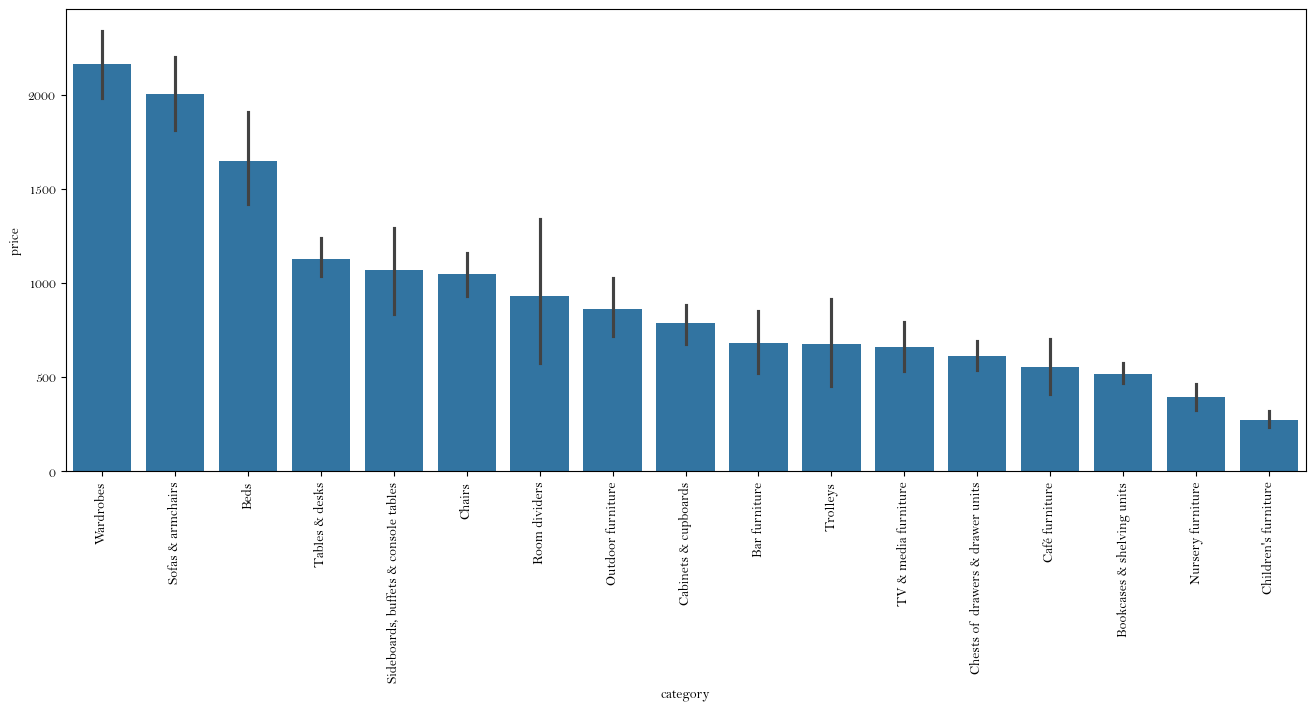

In [165]:
# Visualizing category vs price

plt.figure(figsize=[16, 6])

sns.barplot(data=df, y='price', x='category', order=cat_price['category'])

plt.xticks(rotation=90)
plt.show

# (fig. 16)

Based on above chart, eventhough **wardrobe** is rank 6 from overall sales, it has the highest overall mean value on price than other.

#### Visualizing the `price_diff` vs `price`

C:\Users\devar\AppData\Local\Temp\ipykernel_30136\2354571069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["price_diff"], y=df["price"], palette="Pastel2")


<Axes: xlabel='price_diff', ylabel='price'>

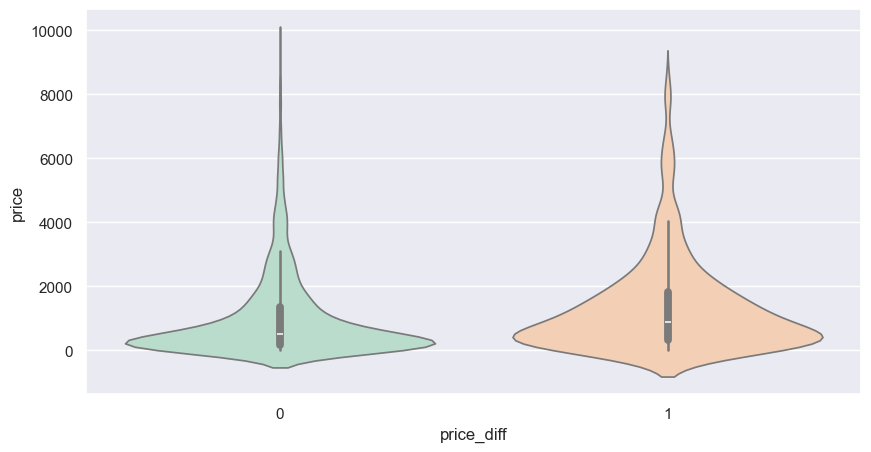

In [167]:
plt.figure(figsize = (10,5))

sns.set(style="darkgrid")
sns.violinplot(x=df["price_diff"], y=df["price"], palette="Pastel2")

# (fig. 17)

**Explanation:**

Based on figure 17 above, product that has price difference between `price` and `old_price` has almost the same **median value** with product that doesn't has price differences. **Median value** also represent the highest probability value showed from the data.

#### Visualizing the `sellable_online` vs `price`

C:\Users\devar\AppData\Local\Temp\ipykernel_30136\2446029122.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["sellable_online"], y=df["price"], palette="Pastel2")


<Axes: xlabel='sellable_online', ylabel='price'>

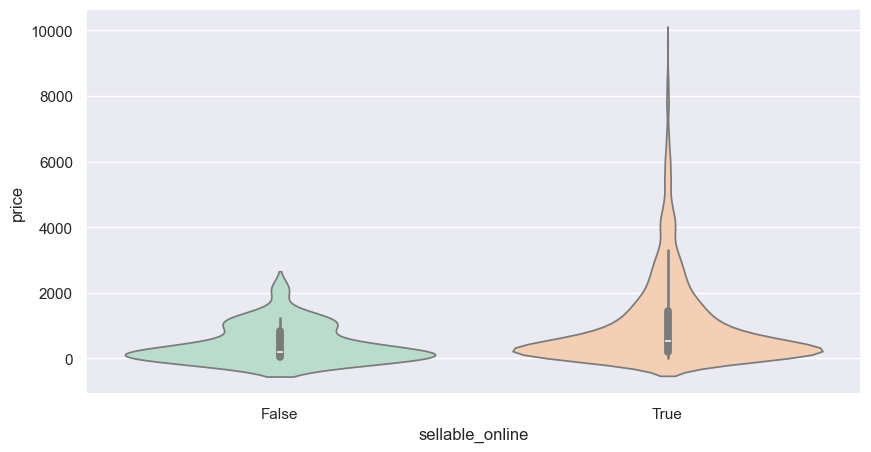

In [171]:
plt.figure(figsize = (10,5))

sns.set(style="darkgrid")
sns.violinplot(x=df["sellable_online"], y=df["price"], palette="Pastel2")

# (fig. 18)

**Explanation:**

Based on figure above, product that available online or `sellable_online` tends to have higher product price probability than product that is not available online.

#### Visualizing the `other_colors` vs `price`

C:\Users\devar\AppData\Local\Temp\ipykernel_30136\1615437488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["other_colors"], y=df["price"], palette="Pastel2")


<Axes: xlabel='other_colors', ylabel='price'>

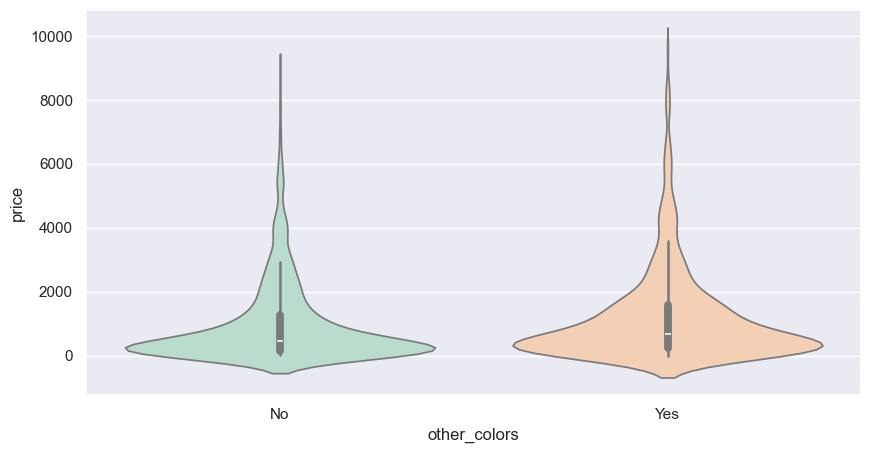

In [175]:
plt.figure(figsize = (10,5))

sns.set(style="darkgrid")
sns.violinplot(x=df["other_colors"], y=df["price"], palette="Pastel2")

# (fig. 19)

**Explanation:**

Based on figure above, product that has other colors, has higher product price probability. Although there are only small price differences beween product with `other_colors` and not.

#### Visualizing the `category` vs `other_colors`

<function matplotlib.pyplot.show(close=None, block=None)>

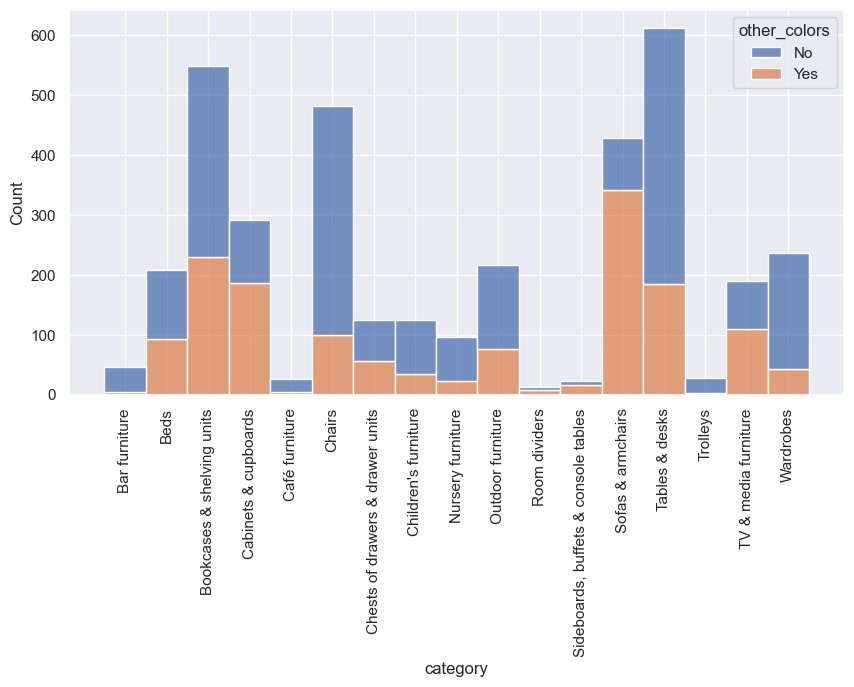

In [179]:
plt.figure(figsize = (10,5))

sns.histplot(data = df,x= "category",hue = 'other_colors',multiple='stack')

plt.xticks(rotation=90)
plt.show

# (fig. 20)

#### Visualizing the `category` vs `sellable_online`

<function matplotlib.pyplot.show(close=None, block=None)>

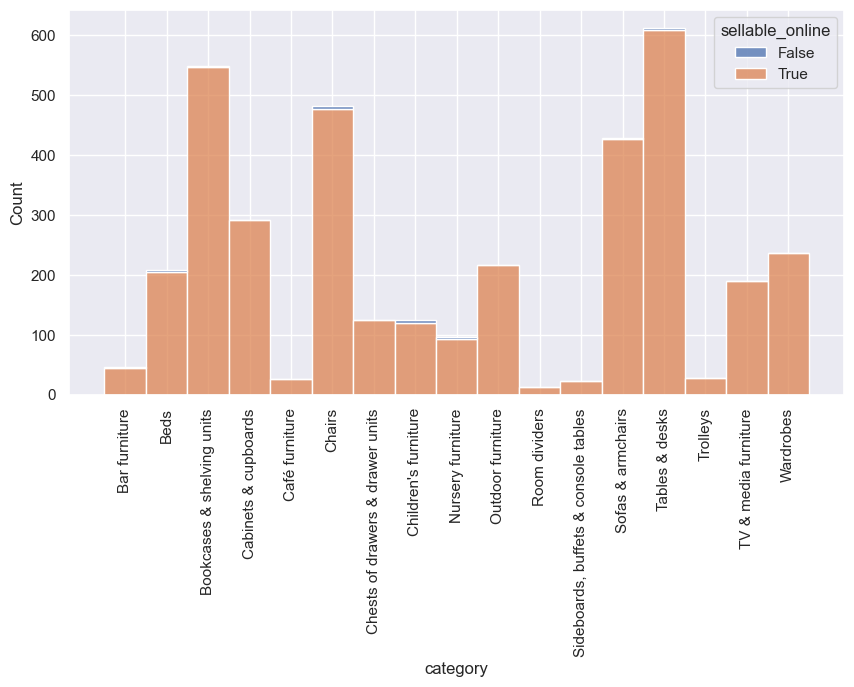

In [182]:
plt.figure(figsize = (10,5))

sns.histplot(data = df,x= "category",hue = 'sellable_online',multiple='stack')

plt.xticks(rotation=90)
plt.show

# (fig. 21)

## MODELING

In [185]:
df_numericals.head()

item_id   price  old_price  depth  height  width    volume  price_diff  \
0  90420332   265.0      265.0   47.0    99.0   51.0  237303.0           0   
1    368814   995.0      995.0   47.0   105.0   80.0  394800.0           0   
2   9333523  2095.0     2095.0   47.0   102.0   48.0  230112.0           0   
3  80155205    69.0       69.0   50.0   100.0   60.0  300000.0           0   
4  30180504   225.0      225.0   60.0    43.0   74.0  190920.0           0   

   diff_amount  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [187]:
df_categoricals.head()

name       category  sellable_online  \
0               FREKVENS  Bar furniture             True   
1              NORDVIKEN  Bar furniture            False   
2  NORDVIKEN / NORDVIKEN  Bar furniture            False   
3                   STIG  Bar furniture             True   
4                NORBERG  Bar furniture             True   

                                                link other_colors  \
0  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...           No   
1  https://www.ikea.com/sa/en/p/nordviken-bar-tab...           No   
2  https://www.ikea.com/sa/en/p/nordviken-nordvik...           No   
3  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...          Yes   
4  https://www.ikea.com/sa/en/p/norberg-wall-moun...           No   

                                   short_description              designer  
0           Bar table, in/outdoor,          51x51 cm  Nicholai Wiig Hansen  
1                      Bar table,          140x80 cm     Francis Cayouette  
2                         Bar table and 4 bar stools     Francis Cayouette  
3            Bar stool with backrest,          74 cm         Henrik Preutz  
4          Wall-mounted drop-leaf table,         ...        Marcus Arvonen

### Data Prepocessing

In [190]:
# drop unused column : item_id, link, short description, old_price

df_numericals = df_numericals.drop(['item_id', 'old_price'], axis = 1)

In [192]:
df_categoricals = df_categoricals.drop(['link', 'short_description'], axis = 1)

In [194]:
# Encoding the df_categoricals, for modeling

from sklearn.preprocessing import LabelEncoder
col = list(df_categoricals)
df_categoricals[col] = df_categoricals[col].apply(LabelEncoder().fit_transform)
df_categoricals.head()

name  category  sellable_online  other_colors  designer
0   123         0                1             0       333
1   387         0                0             0       163
2   390         0                0             0       163
3   493         0                1             1       189
4   380         0                1             0       310

In [196]:
# combining between df_numericals with df_categoricals

df_update = pd.concat([df_categoricals, df_numericals], axis=1, join='inner')

In [198]:
df_update.head()

name  category  sellable_online  other_colors  designer   price  depth  \
0   123         0                1             0       333   265.0   47.0   
1   387         0                0             0       163   995.0   47.0   
2   390         0                0             0       163  2095.0   47.0   
3   493         0                1             1       189    69.0   50.0   
4   380         0                1             0       310   225.0   60.0   

   height  width    volume  price_diff  diff_amount  
0    99.0   51.0  237303.0           0          0.0  
1   105.0   80.0  394800.0           0          0.0  
2   102.0   48.0  230112.0           0          0.0  
3   100.0   60.0  300000.0           0          0.0  
4    43.0   74.0  190920.0           0          0.0

In [200]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_update.drop(columns='price')
target = df_update[['price']]

# First splitting: pretrain and test
feature_price_pretrain, feature_price_test, target_price_pretrain, target_price_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_price_train, feature_price_validation, target_price_train, target_price_validation = train_test_split(feature_price_pretrain, target_price_pretrain, test_size=0.20, random_state=42)

In [202]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_price_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

feature  vif_score
1              name   1.092192
2          category   1.084486
3   sellable_online   1.016534
4      other_colors   1.108256
5          designer   1.035342
6             depth   2.482708
7            height   2.029916
8             width   3.393267
9            volume   6.521976
10       price_diff   1.561410
11      diff_amount   1.674151

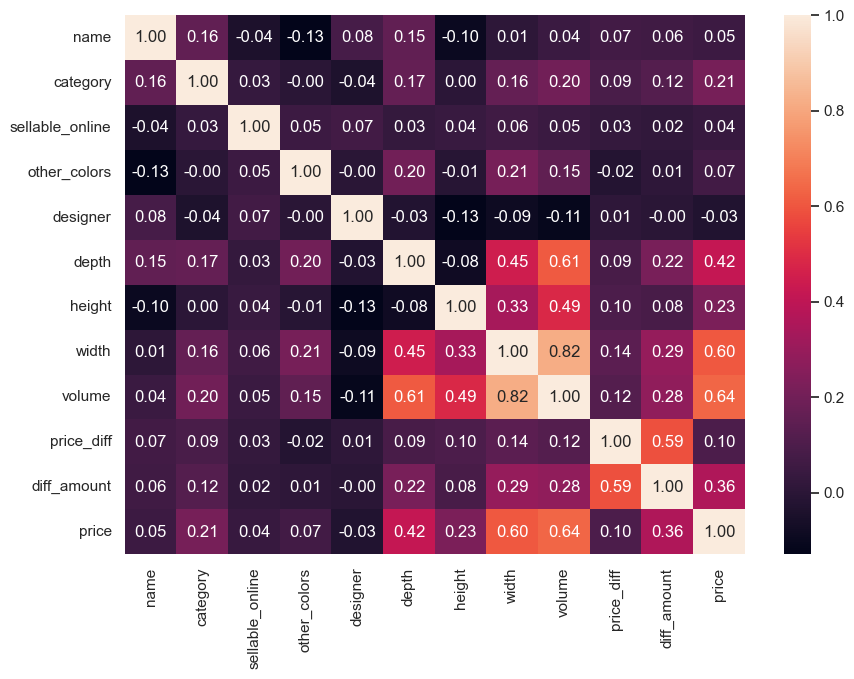

In [204]:
# heatmap correlation
price_train = pd.concat([feature_price_train, target_price_train], axis=1)
corr = price_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Based on above heatmap, we choose to drop `width`, `height` and `depth`, and decided to keep `volume`. Column `volume` already represent product size and/or dimension.

In [207]:
# drop redundant features
feature_price_train = feature_price_train.drop(columns=['width', 'height', 'depth'])
feature_price_validation = feature_price_validation.drop(columns=['width', 'height', 'depth'])
feature_price_test = feature_price_test.drop(columns=['width', 'height', 'depth'])

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_price_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

feature  vif_score
1             name   1.057368
2         category   1.073175
3  sellable_online   1.013317
4     other_colors   1.045568
5         designer   1.029042
6           volume   1.168960
7       price_diff   1.538380
8      diff_amount   1.642156

### RIDGE

In [212]:
from sklearn.linear_model import Ridge

# train the model
X_price_train = feature_price_train.to_numpy()
y_price_train = target_price_train.to_numpy()
y_price_train = y_price_train.reshape(len(y_price_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_price_train, y_price_train)
ridge_reg_pointone.fit(X_price_train, y_price_train)
ridge_reg_one.fit(X_price_train, y_price_train)
ridge_reg_ten.fit(X_price_train, y_price_train)

Ridge(alpha=10, random_state=42)

In [214]:
from sklearn.metrics import mean_squared_error

X_price_validation = feature_price_validation.to_numpy()
y_price_validation = target_price_validation.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 987.252730825766
RMSE of Ridge regression model with alpha = 0.1 is 987.2517050840986
RMSE of Ridge regression model with alpha = 1.0 is 987.2418462723092
RMSE of Ridge regression model with alpha = 10 is 987.1705130199574


Ridge with `lambda/alpha value = 10` has the lowest RMSE value, so it is the **LAMBDA VALUE** 

In [217]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

feature  coefficient
0        intercept    97.781584
1             name     0.003576
2         category    21.064593
3  sellable_online    68.721860
4     other_colors   -58.972591
5         designer     0.692772
6           volume     0.000841
7       price_diff  -463.483432
8      diff_amount     2.067444

**EXPLANATION:**

Holding all other features is zero, the average product price is **97.781584**.

### LASSO

In [221]:
from sklearn.linear_model import Lasso

# train the model
X_price_train = feature_price_train.to_numpy()
y_price_train = target_price_train.to_numpy()
y_price_train = y_price_train.reshape(len(y_price_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_price_train, y_price_train)
lasso_reg_pointone.fit(X_price_train, y_price_train)
lasso_reg_one.fit(X_price_train, y_price_train)
lasso_reg_ten.fit(X_price_train, y_price_train)

Lasso(alpha=10, random_state=42)

In [223]:
from sklearn.metrics import mean_squared_error

X_price_validation = feature_price_validation.to_numpy()
y_price_validation = target_price_validation.to_numpy()
y_price_validation = y_price_validation.reshape(len(y_price_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_price_validation)
    rmse = np.sqrt(mean_squared_error(y_price_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 987.252465278707
RMSE of Lasso regression model with alpha = 0.1 is 987.2500761521387
RMSE of Lasso regression model with alpha = 1.0 is 987.2825197186934
RMSE of Lasso regression model with alpha = 10 is 987.5125295988878


In [225]:
# Model Evaluation

lasso_best = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_price_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

feature  coefficient
0        intercept    71.844397
1             name     0.005163
2         category    21.085834
3  sellable_online    97.688536
4     other_colors   -60.026131
5         designer     0.691070
6           volume     0.000841
7       price_diff  -483.308350
8      diff_amount     2.093324

**EXPLANATION:**

Holding all other features is zero, the average product price is **71.844397**.

### Training Error Ridge


In [229]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_price_train)

In [231]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_price_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_price_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_price_train, y_predict_train)))

RMSE for training data is 998.6901837298269
MAE for training data is 654.1170892121919
MAPE for training data is 3.5985254264731674


In [233]:
# Testing Error

# prepare prediction result on test data
X_price_test = feature_price_test.to_numpy()
y_predict_test = ridge_best.predict(X_price_test)

# ground truth target
y_price_test = target_price_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

In [235]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_price_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_price_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_price_test, y_predict_test)))

RMSE for testing data is 1019.9781385549286
MAE for testing data is 654.3331930612877
MAPE for testing data is 4.249702968219501


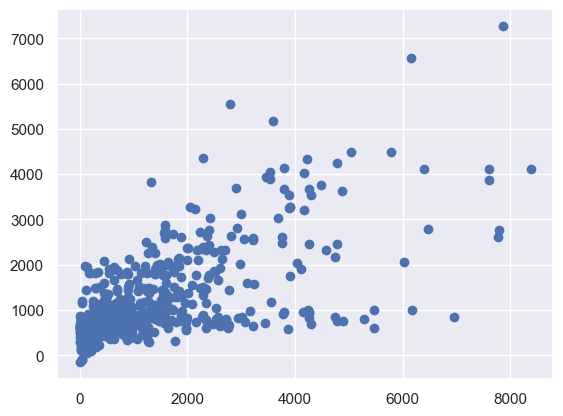

In [237]:
plt.scatter(y_price_test,y_predict_test)

### Training Error Lasso

In [240]:
# prepare prediction result on training data

y_predict_train = lasso_best.predict(X_price_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_price_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_price_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_price_train, y_predict_train)))

RMSE for training data is 998.6638772559531
MAE for training data is 654.4635527199953
MAPE for training data is 3.6049379799109915


In [242]:
# prepare prediction result on test data

X_price_test = feature_price_test.to_numpy()
y_predict_test = lasso_best.predict(X_price_test)

# ground truth target

y_price_test = target_price_test.to_numpy()
y_price_test = y_price_test.reshape(len(y_price_test),)

In [244]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_price_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_price_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_price_test, y_predict_test)))

RMSE for testing data is 1019.9710520387994
MAE for testing data is 654.9349302761655
MAPE for testing data is 4.263537130230902


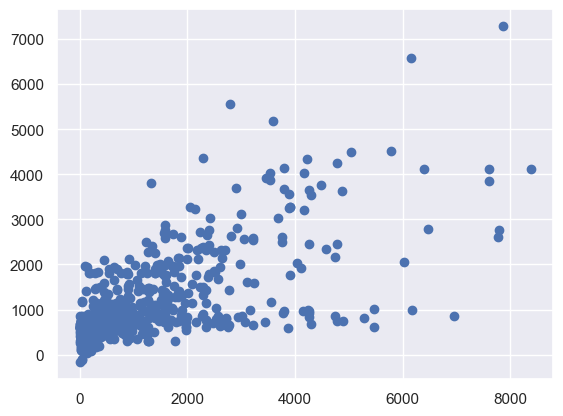

In [246]:
plt.scatter(y_price_test,y_predict_test)

## SUPPORTING DATA

In this section we will try to do some small analysis based on **IKEA** yearly financial report, to find out what is the core problem for our modeling.

In [254]:
# read ikea financial report resume csv

df_finance = pd.read_csv('IKEA Financial Report.csv')

In [256]:
df_finance

Year  Sales_of_goods  Franchise_Fees  Cost_of_Good_Sold  Gross_Profit  \
0  2022     26148000000      1285000000        23404000000    4174000000   
1  2021     24282000000      1273000000        21137000000    4478000000   
2  2020     22387000000      1162000000        18860000000    4753000000   
3  2019     23916000000      1195000000        20633000000    4551000000   
4  2018     23651000000      1200000000        20228000000    4691000000   
5  2017     20778000000      1156000000        18688000000    4190000000   

   Operational_Cost  Website_visit  Net_Income  
0        3140000000     4300000000   710000000  
1        2622000000     5000000000  1433000000  
2        2529000000     4000000000  1731000000  
3        2695000000     2800000000  1485000000  
4        2729000000     2500000000  1449000000  
5        2894000000     2300000000   912000000

In [258]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               6 non-null      int64
 1   Sales_of_goods     6 non-null      int64
 2   Franchise_Fees     6 non-null      int64
 3   Cost_of_Good_Sold  6 non-null      int64
 4   Gross_Profit       6 non-null      int64
 5   Operational_Cost   6 non-null      int64
 6   Website_visit      6 non-null      int64
 7   Net_Income         6 non-null      int64
dtypes: int64(8)
memory usage: 516.0 bytes


**DATAFRAME EXPLANATION**
<br>

|       Column       |       Explanation       |
|--------------------|-------------------------|
|  `Year`   | Year of the annual report  |
|  `Sales of goods`       | Total Sales from goods / products |
|  `Franchise Fees`      | Franchise Fees |
|  `Cost of Good Sold` |  Direct costs of producing the goods sold by a company  [$] |
|  `Gross Profit`     | Profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services |
|  `Operational Cost`  | The ongoing expenses incurred from the normal day-to-day of running a business |
| `Website Visit`     | Total times customer visit **IKEA** website |
|  `Net Income`    | Net earnings, sales minus cost of goods sold, general expenses, taxes, and interest |

In [261]:
df_fin1 = df_finance.drop(labels = ['Franchise_Fees','Gross_Profit','Website_visit', 'Operational_Cost', 'Net_Income'], axis = 1)
df_fin1.head()

Year  Sales_of_goods  Cost_of_Good_Sold
0  2022     26148000000        23404000000
1  2021     24282000000        21137000000
2  2020     22387000000        18860000000
3  2019     23916000000        20633000000
4  2018     23651000000        20228000000

In [263]:
df_fin2 = df_finance.drop(labels = ['Franchise_Fees','Gross_Profit','Website_visit', 'Sales_of_goods', 'Cost_of_Good_Sold'], axis = 1)
df_fin2.head()

Year  Operational_Cost  Net_Income
0  2022        3140000000   710000000
1  2021        2622000000  1433000000
2  2020        2529000000  1731000000
3  2019        2695000000  1485000000
4  2018        2729000000  1449000000

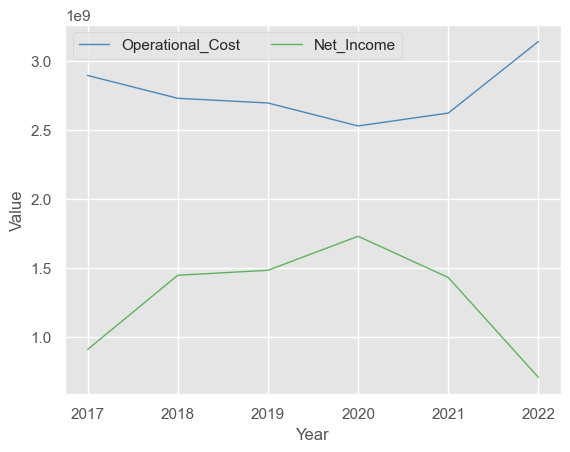

In [268]:
# Change the style of plot
plt.style.use('ggplot')  # You can replace 'ggplot' with any other available style
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num = 0
for column in df_fin2.drop('Year', axis=1):
    num += 1
    plt.plot(df_fin2['Year'], df_fin2[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.xlabel("Year")
plt.ylabel("Value")

# Show the graph
plt.show()


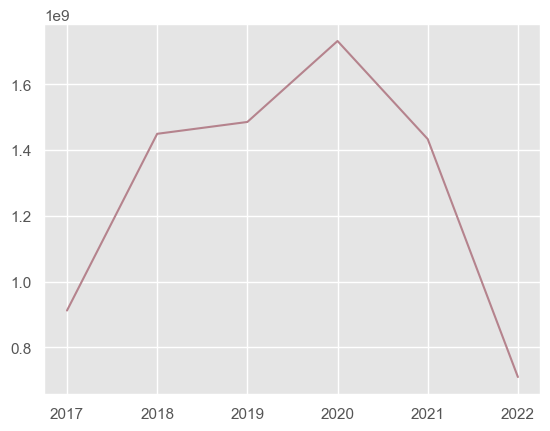

In [270]:
# Draw plot
plt.plot( 'Year', 'Net_Income', data=df_finance, color='#b5838d')
plt.show()

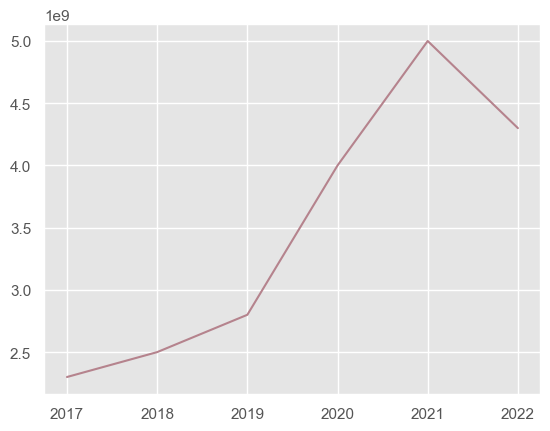

In [272]:
# Draw plot
plt.plot( 'Year', 'Website_visit', data=df_finance, color='#b5838d')
plt.show()

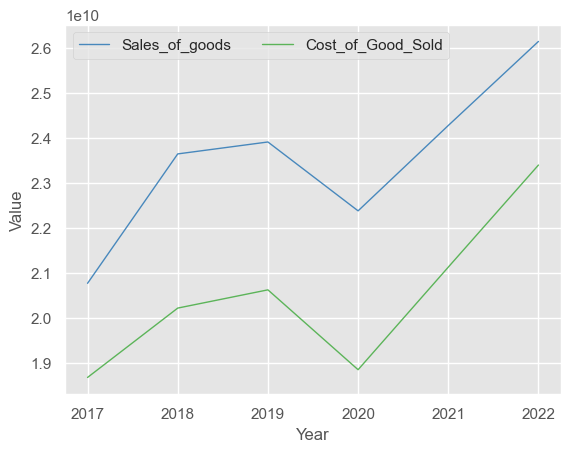

In [276]:
# Change the style of plot
plt.style.use('ggplot')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in df_fin1.drop('Year', axis=1):
    num+=1
    plt.plot(df_fin1['Year'], df_fin1[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.xlabel("Year")
plt.ylabel("Value")

# Show the graph
plt.show()

In [294]:
#Time Series Analysis

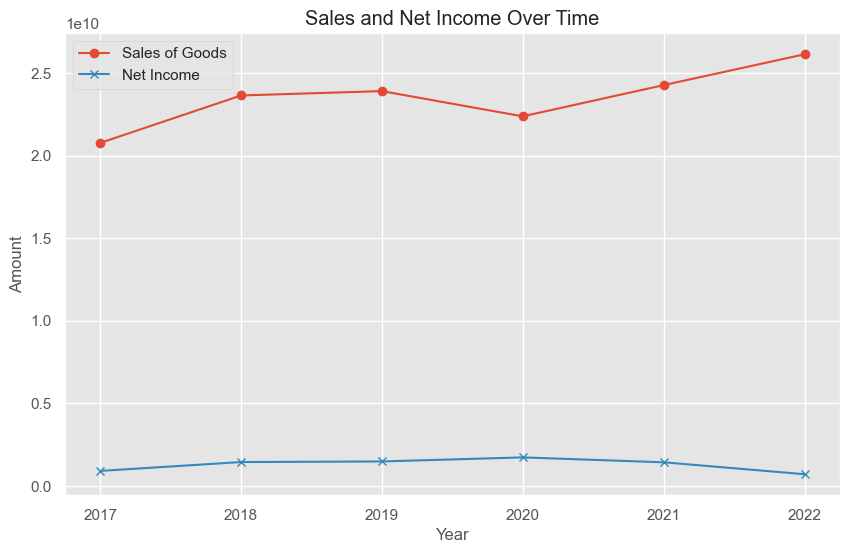

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

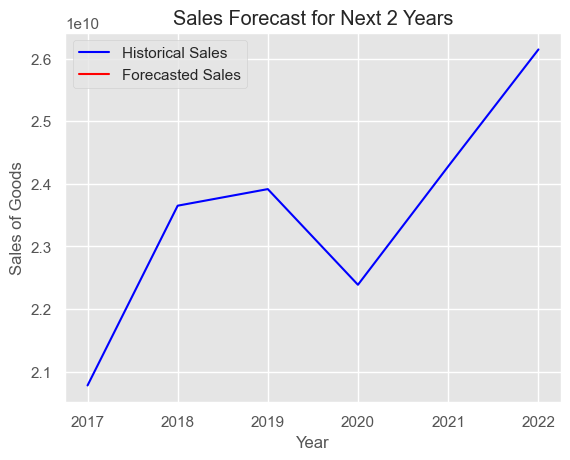

In [288]:
from statsmodels.tsa.arima.model import ARIMA
# Ensure 'Year' is treated as a datetime index for time series analysis
df_finance['Year'] = pd.to_datetime(df_finance['Year'], format='%Y')

# Aggregate by year (already done in dataset) - For example, Sales of Goods
plt.figure(figsize=(10, 6))
plt.plot(df_finance['Year'], df_finance['Sales_of_goods'], label='Sales of Goods', marker='o')
plt.plot(df_finance['Year'], df_finance['Net_Income'], label='Net Income', marker='x')
plt.title('Sales and Net Income Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

# Fit an ARIMA model for future forecasting (example for 'Sales_of_goods')
sales_series = df_finance.set_index('Year')['Sales_of_goods']
model = ARIMA(sales_series, order=(1,1,1))  # Adjust order based on data analysis
model_fit = model.fit()

# Make predictions for the next 2 years
forecast = model_fit.forecast(steps=2)
forecast_index = pd.date_range(start='2023', periods=2, freq='Y')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Sales'])

# Visualize Forecast
plt.plot(sales_series.index, sales_series, label='Historical Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Next 2 Years')
plt.xlabel('Year')
plt.ylabel('Sales of Goods')
plt.legend()
plt.show()

In [296]:
#Price Prediction Enhancement

In [298]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preprocessing
df['category'] = df['category'].fillna('Unknown')
df['old_price'] = df['old_price'].replace('No old price', np.nan).astype(float)
df['sellable_online'] = df['sellable_online'].astype(int)

# Encode categorical features
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Define features and target
X = df[['category_encoded', 'old_price', 'depth', 'height', 'width', 'sellable_online']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor for price prediction
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict and calculate RMSE
y_pred = best_rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Optimized Random Forest RMSE for Price Prediction: {rmse}")


Optimized Random Forest RMSE for Price Prediction: 125.95845266100937


In [300]:
#Customer segmentation

In [308]:
# Group by Customer_ID to calculate Frequency and Monetary
rfm_df = df.groupby('Customer_ID').agg(
    Frequency=('item_id', 'count'),  # Frequency: Number of purchases
    Monetary=('price', 'sum')  # Monetary: Total amount spent by customer
).reset_index()

# Check the result of the RFM calculation
print(rfm_df.head())

# You can further segment customers based on quantiles or clustering


   Customer_ID  Frequency  Monetary
0            0          4    2546.0
1            1          2      70.0
2            2          4    2025.0
3            3          3    2372.0
4            5          8    8261.0


C:\Users\devar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


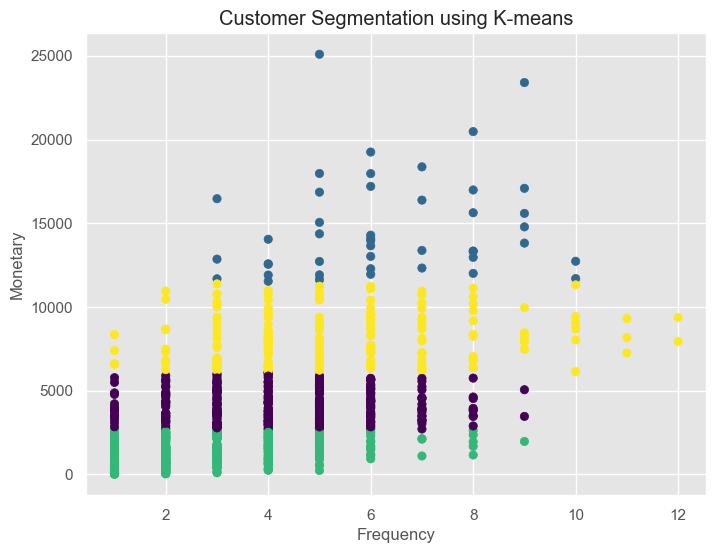

   Customer_ID  Frequency  Monetary  Cluster
0            0          4    2546.0        2
1            1          2      70.0        2
2            2          4    2025.0        2
3            3          3    2372.0        2
4            5          8    8261.0        3


In [310]:
# Selecting the features for clustering (Frequency and Monetary)
rfm_df = rfm_df[['Customer_ID', 'Frequency', 'Monetary']]

# Using K-means to segment customers into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df[['Frequency', 'Monetary']])

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(rfm_df['Frequency'], rfm_df['Monetary'], c=rfm_df['Cluster'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation using K-means')
plt.show()

# Check the result of clustering
print(rfm_df.head())


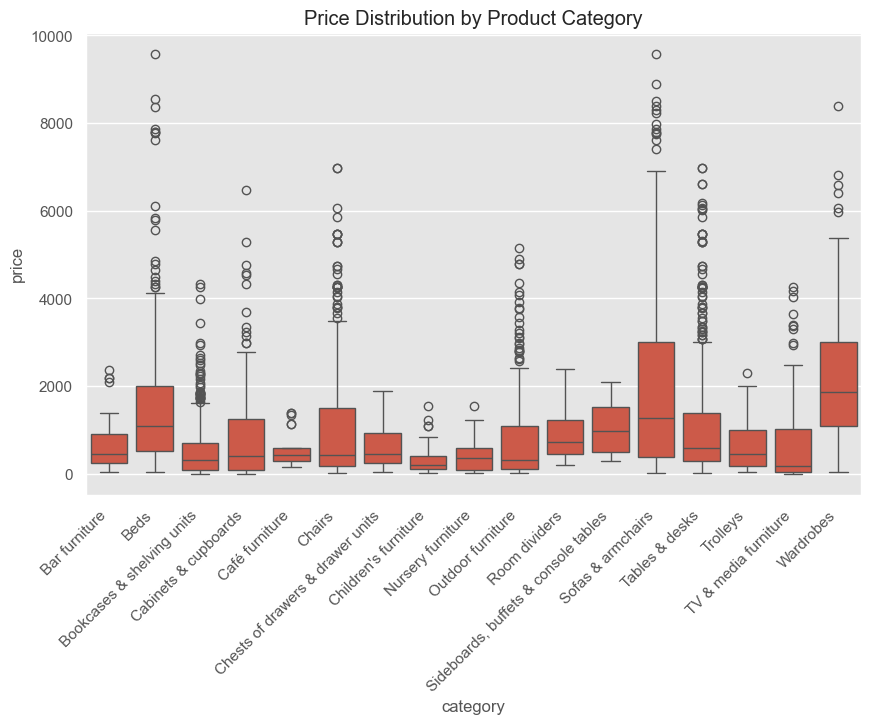

In [312]:
# Segmenting products by category and plotting their price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='price')
plt.title('Price Distribution by Product Category')
plt.xticks(rotation=45, ha='right')
plt.show()


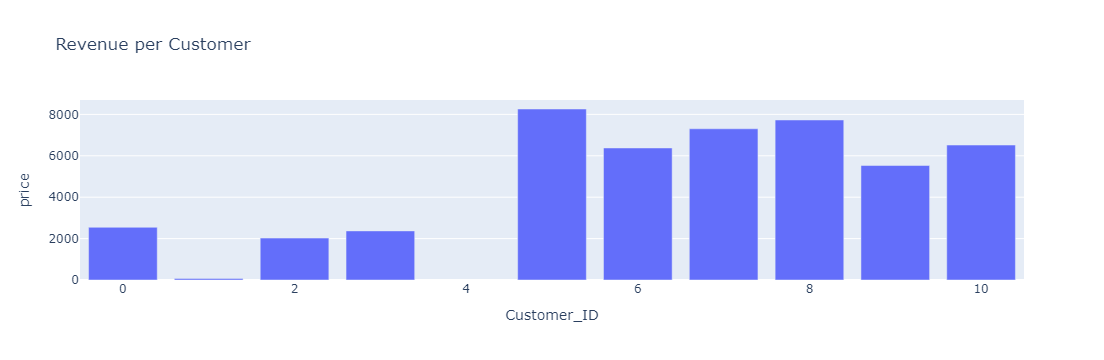

In [359]:
# Group by 'Customer_ID' and calculate total price (revenue) for each customer
customer_revenue = df.groupby('Customer_ID')['price'].sum().reset_index()

# Visualize the data if needed (example: bar plot for the first 10 customers)
import plotly.express as px
fig = px.bar(customer_revenue.head(10), x='Customer_ID', y='price', title="Revenue per Customer")
fig.show()


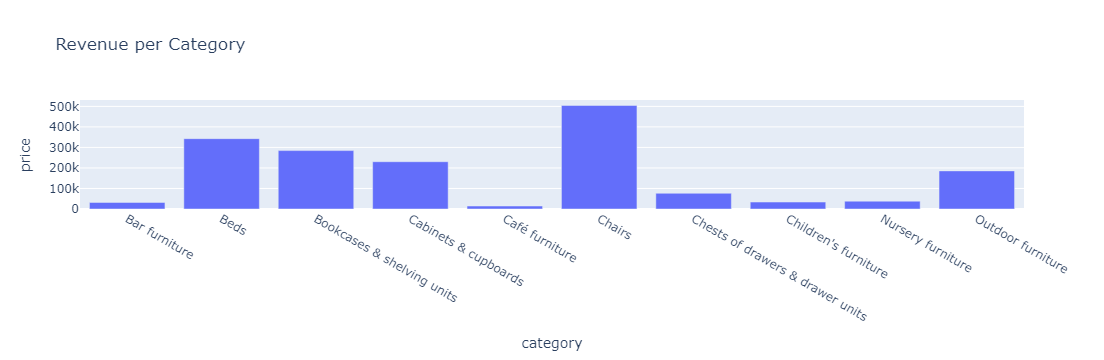

In [369]:
# Group by 'category' and calculate total price (revenue) for each category
category_revenue = df.groupby('category')['price'].sum().reset_index()

# Visualize the data (example: bar plot for the first 10 categories)
fig = px.bar(category_revenue.head(10), x='category', y='price', title="Revenue per Category", )
fig.update_layout(
    yaxis=dict(
        tick0=0,  # Start the ticks from 0
        dtick=100000  # Set the step size to 100k
    )
)
fig.show()


In [367]:
#A/B analysis
df.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width', 'volume', 'price_diff', 'diff_amount',
       'category_encoded', 'Customer_ID', 'treatment_group'],
      dtype='object')

In [373]:
import scipy.stats as stats

# Ensure treatment_group is correctly named
# Check the unique values in the 'treatment_group' column
print(df['treatment_group'].unique())

# Split the data into two groups based on treatment group
group_1 = df[df['treatment_group'] == 'Control']['price']  # Replace 'Control' with the actual value if needed
group_2 = df[df['treatment_group'] == 'Treatment']['price']  # Replace 'Treatment' with the actual value if needed

# Perform T-test to compare the means of the two groups
t_stat, p_val = stats.ttest_ind(group_1, group_2)

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# If p-value < 0.05, we reject the null hypothesis (significant difference)
if p_val < 0.05:
    print("There is a significant difference between the two treatment groups.")
else:
    print("No significant difference between the two treatment groups.")




['B' 'A']
T-statistic: nan, P-value: nan
No significant difference between the two treatment groups.


In [375]:
print(group_1.count())  # Number of data points in Group A
print(group_2.count())  # Number of data points in Group B


0
0


In [377]:
print(df['treatment_group'].unique())


['B' 'A']


In [379]:
print(df[['treatment_group', 'price']].isna().sum())


treatment_group    0
price              0
dtype: int64


In [381]:
df_clean = df.dropna(subset=['treatment_group', 'price'])


In [383]:
# Filter the groups
group_1 = df_clean[df_clean['treatment_group'] == 'A']['price']
group_2 = df_clean[df_clean['treatment_group'] == 'B']['price']

# Check the counts
print(group_1.count())  # Number of data points in Group A
print(group_2.count())  # Number of data points in Group B


1864
1830


In [385]:
print(group_1.describe())  # Descriptive statistics for Group A
print(group_2.describe())  # Descriptive statistics for Group B


count    1864.000000
mean     1097.123498
std      1387.621970
min         5.000000
25%       195.000000
50%       555.000000
75%      1445.000000
max      9585.000000
Name: price, dtype: float64
count    1830.000000
mean     1058.941913
std      1361.424034
min         3.000000
25%       175.000000
50%       499.500000
75%      1398.750000
max      8551.000000
Name: price, dtype: float64


In [387]:
import scipy.stats as stats

# T-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(group_1, group_2, equal_var=False)

print(f'T-statistic: {t_stat}, P-value: {p_value}')
if p_value < 0.05:
    print("There is a significant difference between the two treatment groups.")
else:
    print("No significant difference between the two treatment groups.")


T-statistic: 0.8441514504906198, P-value: 0.39863947284386214
No significant difference between the two treatment groups.


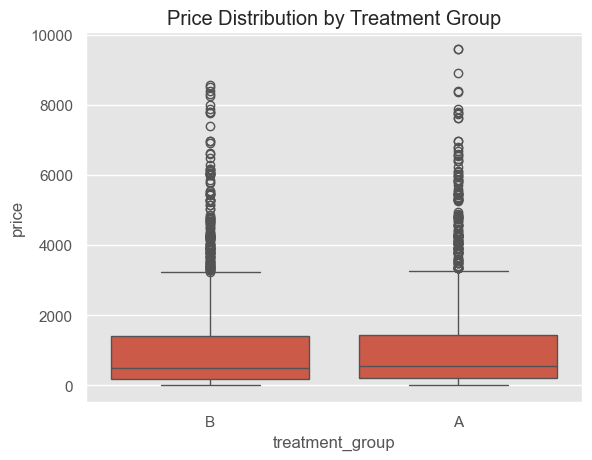

In [389]:
#Explanation:
#T-statistic (0.8441): This measures the difference between the two group means relative to the variability within the groups. A smaller t-statistic means the difference is less pronounced, which seems to be the case here.
#P-value (0.3986): The p-value indicates the probability of obtaining the observed results (or more extreme results) if there were actually no difference between the groups. A p-value greater than 0.05 (which is the common threshold) suggests that the difference between the two groups is not statistically significant.
#Interpretation:
#Since the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no statistically significant difference in the price between the two treatment groups (A and B).
# Visualize the distribution of price in both groups
sns.boxplot(x='treatment_group', y='price', data=df_clean)
plt.title('Price Distribution by Treatment Group')
plt.show()

In [391]:
#investigating the variability
print(group_1.std())  # Standard deviation of Group A
print(group_2.std())  # Standard deviation of Group B


1387.621970458446
1361.4240337329318


In [395]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --- ----------------------------------- 51.2/626.3 kB 660.6 kB/s eta 0:00:01
   --------- ------------------------------ 143.4/626.3 kB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/626.3 kB 2.1 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/626.3 kB 2.3 MB/s eta 0:00:01
   ------------------------------------- -- 593.9/626.3 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


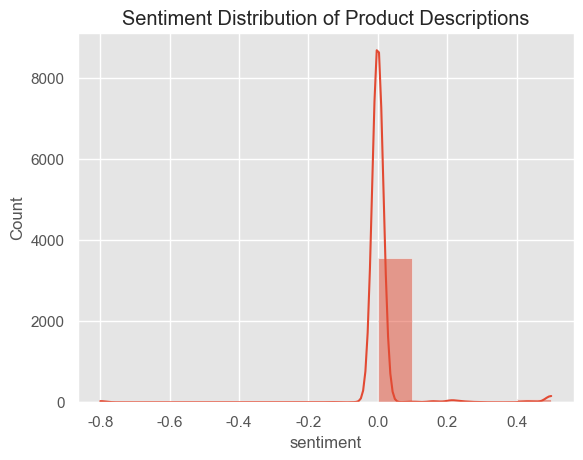

In [397]:
from textblob import TextBlob

# Assuming df has a 'short_description' column
df['sentiment'] = df['short_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
sns.histplot(df['sentiment'], kde=True)
plt.title('Sentiment Distribution of Product Descriptions')
plt.show()


In [399]:
#Neutral Sentiments: The heavy concentration around 0 indicates that the product descriptions are neither too positive nor too negative. 
#This might be a deliberate choice to maintain objectivity.

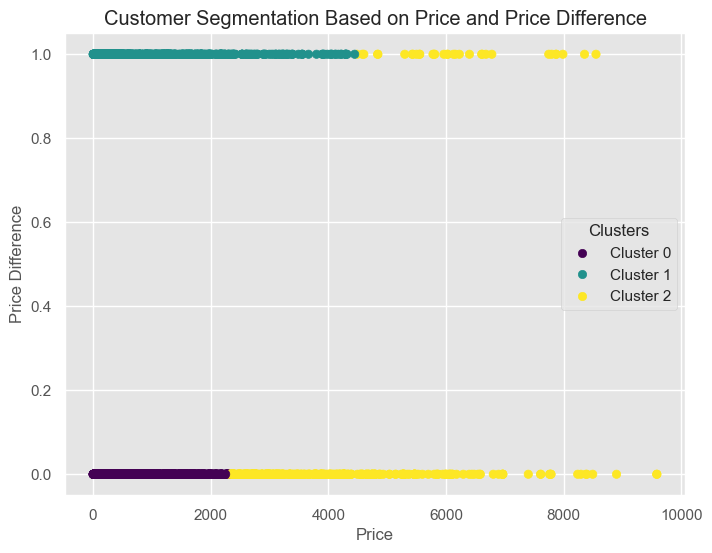

In [413]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['price', 'price_diff']]  # You can add other relevant columns too

# Standardize the features before clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters with a legend
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['price'], df['price_diff'], c=df['Cluster'], cmap='viridis')

# Add labels for the axes
plt.xlabel('Price')
plt.ylabel('Price Difference')
plt.title('Customer Segmentation Based on Price and Price Difference')

# Create a legend with labels for each cluster
# Generate the legend based on the unique cluster values
legend_labels = [f'Cluster {i}' for i in range(3)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

# Show the plot
plt.show()



In [415]:
#Cluster 0: This cluster might include products that are priced at certain levels and have a particular discount range. 
#For example, products that have a smaller price difference (i.e., not heavily discounted) but are priced within a certain price range could belong here.

#Cluster 1: This group could represent products that are either highly discounted or have a large price difference compared to their original prices. 
#The pricing of products in this cluster may vary, but they might share the characteristic of being in a high discount range.

#Cluster 2: This cluster could represent products that are priced at higher price points with potentially moderate price differences 
#(i.e., they could be slightly discounted or sold at a premium with no significant discount).

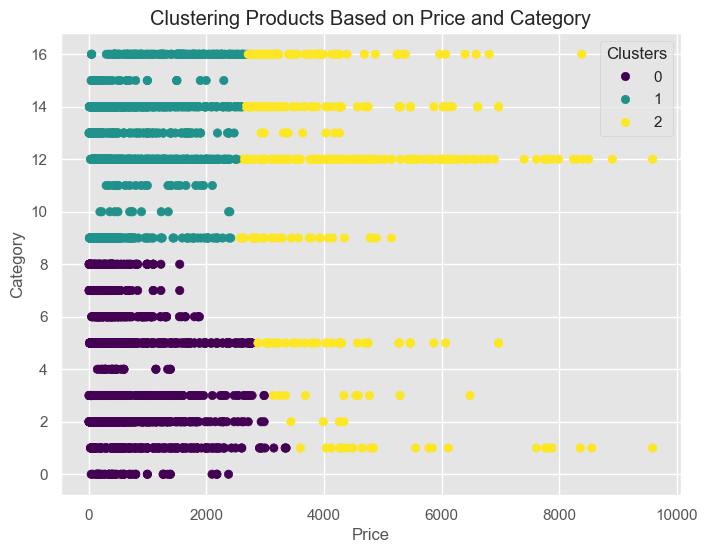

In [419]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering: price and category (encoded)
features = df[['price', 'category_encoded']]  # You can use other features too

# Standardize the features before clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['price'], df['category_encoded'], c=df['Cluster'], cmap='viridis')

# Add legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clusters")

plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Clustering Products Based on Price and Category')
plt.show()


In [421]:
#What the axes represent:
#X-axis (Price): The price of the product. This represents the monetary value of the product.
#Y-axis (Category encoded): The encoded category of the product. Since categories are typically categorical (e.g., "Bar Furniture," "Office Furniture"), these are converted into numeric values using encoding techniques so that they can be used in machine learning algorithms. The encoded values represent the different categories (each category gets a unique number).
#What the clusters represent:
#The colors in the scatter plot correspond to the clusters identified by the K-Means algorithm. The K-Means algorithm attempts to divide the data into n clusters (in this case, 3) based on the similarity of the features being analyzed (Price and Category in this case).

#Each cluster represents a group of products that share similar patterns in their price and category (encoded). Here’s what you can infer from the plot:

#Cluster 1 (e.g., represented by color 1): These are products that likely share a similar price range and belong to a particular category (based on their encoded values). For example, they might all be higher-priced items from a specific category.

#Cluster 2 (e.g., represented by color 2): This cluster represents products that are similar in price but belong to a different category.

#Cluster 3 (e.g., represented by color 3): This group might represent a third set of products that have another distinct price range or belong to yet another category.

#Insights from the plot:
#Price Segmentation: By looking at the distribution of prices in each cluster, you can see how products are grouped according to their price points. Are there certain price ranges where most of your products are concentrated?

#Category-Based Grouping: The clusters also show how different categories (based on the encoded value) are distributed with respect to price. This might help in identifying if specific categories are priced similarly or if certain categories dominate in terms of pricing.

#Outliers or Special Cases: If any points are far from the main cluster groups (outliers), it may signify that those products are priced unusually compared to others.

In [433]:
#Can we predict the "price" of a product based on its physical attributes such as depth, height, width, and volume?

In [435]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you already have the DataFrame 'df' loaded with relevant data

# 1. Select Features and Target
# Features: depth, height, width, volume
features = df[['depth', 'height', 'width', 'volume']]
# Target: price
target = df['price']

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 3. Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Example: Predict the price for a new product with specific features
new_product = pd.DataFrame({
    'depth': [20],
    'height': [50],
    'width': [30],
    'volume': [3000]
})

# Predict the price
predicted_price = model.predict(new_product)
print(f"Predicted Price for New Product: {predicted_price[0]}")


Mean Absolute Error: 378.3558806227717
R² Score: 0.7461041046041688
Predicted Price for New Product: 73.665


In [437]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Add more features for improvement
features = df[['category_encoded', 'designer_encoded', 'depth', 'height', 'width', 'volume', 'price_diff']]
target = df['price']  # Target variable is 'price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Improved Mean Absolute Error: {mae}")

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"Improved R² Score: {r2}")


Improved Mean Absolute Error: 322.3311275355948
Improved R² Score: 0.8062080331315353


In [441]:
# Assuming demand is inversely related to price (just for demonstration)
df['demand'] = 1000 - df['price']  # Create a synthetic demand column (example)

# Check the dataframe to verify the new 'demand' column
print(df[['price', 'demand']].head())


    price  demand
0   265.0   735.0
1   995.0     5.0
2  2095.0 -1095.0
3    69.0   931.0
4   225.0   775.0


In [443]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Select features and target for regression (predict demand)
features = df[['price', 'category_encoded', 'volume', 'depth', 'height']]
target = df['demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor to predict demand
model_demand = RandomForestRegressor(n_estimators=100, random_state=42)
model_demand.fit(X_train, y_train)

# Make predictions
y_pred_demand = model_demand.predict(X_test)

# Evaluate the model
mae_demand = mean_absolute_error(y_test, y_pred_demand)
print(f"Demand Prediction Mean Absolute Error: {mae_demand}")

r2_demand = r2_score(y_test, y_pred_demand)
print(f"Demand Prediction R² Score: {r2_demand}")


Demand Prediction Mean Absolute Error: 1.8361244925575055
Demand Prediction R² Score: 0.9999659903788578


In [447]:
# Check for missing values in the dataset
print(df.isnull().sum())


item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                   0
height                  0
width                   0
volume                  0
price_diff              0
diff_amount             0
category_encoded        0
Customer_ID             0
treatment_group         0
sentiment               0
Cluster                 0
designer_encoded        0
demand                  0
price_category       1229
dtype: int64


In [449]:
df.dropna(inplace=True)  # Drops rows with missing values


In [455]:
# Fill missing values with column mean for numeric columns
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


In [457]:
# Handle missing values in numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with their mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Handle missing values in categorical columns
# For the 'price_category', we'll fill with the most frequent category (mode)
df['price_category'] = df['price_category'].fillna(df['price_category'].mode()[0])

# After filling missing values, you can check if there are any remaining NaNs
print(df.isnull().sum())

# Proceed with model training
features = df[['price', 'category_encoded', 'volume', 'depth', 'height']]
target = df['demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor to predict demand
model_demand = RandomForestRegressor(n_estimators=100, random_state=42)
model_demand.fit(X_train, y_train)

# Make predictions
y_pred_demand = model_demand.predict(X_test)

# Evaluate the model
mae_demand = mean_absolute_error(y_test, y_pred_demand)
print(f"Demand Prediction Mean Absolute Error: {mae_demand}")

r2_demand = r2_score(y_test, y_pred_demand)
print(f"Demand Prediction R² Score: {r2_demand}")


item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
volume               0
price_diff           0
diff_amount          0
category_encoded     0
Customer_ID          0
treatment_group      0
sentiment            0
Cluster              0
designer_encoded     0
demand               0
price_category       0
dtype: int64
Demand Prediction Mean Absolute Error: 0.2998539553752563
Demand Prediction R² Score: 0.9999931630530438


In [459]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (with 5 folds for example)
cv_scores = cross_val_score(model_demand, features, target, cv=5, scoring='neg_mean_absolute_error')

# Print the results
print(f"Cross-Validation MAE scores: {-cv_scores}")
print(f"Mean Cross-Validation MAE: {-cv_scores.mean()}")

# You can also use R² as a metric for cross-validation
cv_r2_scores = cross_val_score(model_demand, features, target, cv=5, scoring='r2')
print(f"Cross-Validation R² scores: {cv_r2_scores}")
print(f"Mean Cross-Validation R²: {cv_r2_scores.mean()}")


Cross-Validation MAE scores: [0.35840974 0.26533266 0.19060649 0.32451318 0.27256187]
Mean Cross-Validation MAE: 0.2822847870182554
Cross-Validation R² scores: [0.99999158 0.99999353 0.99999664 0.99999131 0.9999953 ]
Mean Cross-Validation R²: 0.9999936708716118


In [461]:
# Get feature importance from the trained model
feature_importances = model_demand.feature_importances_

# Create a DataFrame to display the importance of each feature
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)


            Feature  Importance
0             price    0.999992
4            height    0.000002
2            volume    0.000002
3             depth    0.000002
1  category_encoded    0.000001


In [463]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=model_demand, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation MAE: {-grid_search.best_score_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation MAE: 0.3355790416733747


In [467]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Define the ranges for the features (adjust the ranges if needed based on your domain knowledge)
price_range = (10, 500)  # Price between 10 and 500
category_encoded_range = (0, 10)  # Random category encoded values (this could be categorical encoding)
volume_range = (1, 100)  # Volume between 1 and 100
depth_range = (1, 50)  # Depth between 1 and 50
height_range = (1, 50)  # Height between 1 and 50

# Generate 100 new samples (you can adjust the number of samples as needed)
n_samples = 100

new_data = pd.DataFrame({
    'price': np.random.uniform(*price_range, size=n_samples),
    'category_encoded': np.random.randint(*category_encoded_range, size=n_samples),
    'volume': np.random.uniform(*volume_range, size=n_samples),
    'depth': np.random.uniform(*depth_range, size=n_samples),
    'height': np.random.uniform(*height_range, size=n_samples)
})

# Display the first few rows of the new dataset
print(new_data.head())


        price  category_encoded     volume      depth     height
0  193.524658                 6  21.698090   2.353222  18.068494
1  475.850010                 0  54.603349  29.364380  46.895759
2  368.677031                 3  69.882656  22.485232   2.920130
3  303.342657                 3  23.626452  33.929281  21.479356
4   86.449134                 4  18.320538  17.079481  48.411447


In [469]:
# Assuming you have a new dataset `new_data`
new_features = new_data[['price', 'category_encoded', 'volume', 'depth', 'height']]

# If necessary, encode the categorical features of the new dataset
# (Ensure the same preprocessing steps are applied as to the training data)

# Make predictions on the new data
new_predictions = model_demand.predict(new_features)

# Output predictions
print(new_predictions)


[805.    524.71  630.31  694.386 913.68  913.68  961.29  565.28  693.606
 644.01  980.    514.57  582.08  885.56  901.    900.    840.57  733.428
 779.9   847.67  689.926 920.94  845.    810.53  765.344 605.492 890.898
 739.115 700.03  967.635 691.638 905.9   960.085 525.3   518.85  593.6
 840.57  942.28  655.05  775.1   930.    744.55  972.98  544.71  863.9
 664.57  834.86  734.868 723.63  900.    514.57  611.782 528.95  550.75
 694.446 539.41  944.5   894.698 967.635 830.35  800.    857.74  584.47
 814.752 851.    724.17  920.94  594.23  954.525 506.33  611.696 892.758
 988.026 590.31  643.94  635.6   611.696 954.525 814.394 934.76  565.22
 684.512 828.71  960.09  839.98  830.45  630.43  675.08  555.31  760.04
 931.    641.7   618.198 714.92  611.782 750.13  733.458 780.    978.
 935.31 ]


Predicted Demand Values:
 [805.    524.71  630.31  694.386 913.68  913.68  961.29  565.28  693.606
 644.01  980.    514.57  582.08  885.56  901.    900.    840.57  733.428
 779.9   847.67  689.926 920.94  845.    810.53  765.344 605.492 890.898
 739.115 700.03  967.635 691.638 905.9   960.085 525.3   518.85  593.6
 840.57  942.28  655.05  775.1   930.    744.55  972.98  544.71  863.9
 664.57  834.86  734.868 723.63  900.    514.57  611.782 528.95  550.75
 694.446 539.41  944.5   894.698 967.635 830.35  800.    857.74  584.47
 814.752 851.    724.17  920.94  594.23  954.525 506.33  611.696 892.758
 988.026 590.31  643.94  635.6   611.696 954.525 814.394 934.76  565.22
 684.512 828.71  960.09  839.98  830.45  630.43  675.08  555.31  760.04
 931.    641.7   618.198 714.92  611.782 750.13  733.458 780.    978.
 935.31 ]
   Predicted Demand
0           805.000
1           524.710
2           630.310
3           694.386
4           913.680


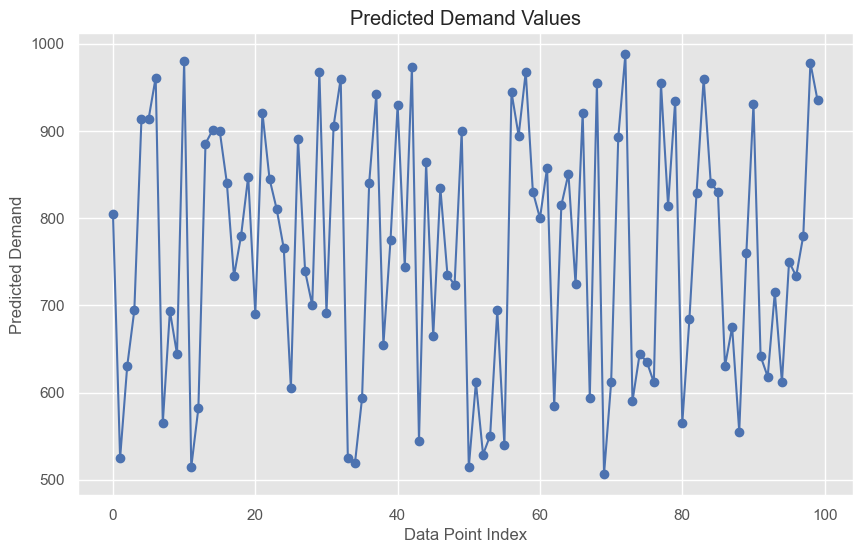

In [471]:
# Inspect the predicted values
print("Predicted Demand Values:\n", new_predictions)

# Optionally, you can create a DataFrame for easy inspection
predicted_df = pd.DataFrame(new_predictions, columns=["Predicted Demand"])
print(predicted_df.head())

# Optionally, you can plot the predicted demand values for visualization
plt.figure(figsize=(10, 6))
plt.plot(predicted_df, marker='o', linestyle='-', color='b')
plt.title("Predicted Demand Values")
plt.xlabel("Data Point Index")
plt.ylabel("Predicted Demand")
plt.show()

In [473]:
# Assuming you have the actual demand values in a list or array
# Replace `actual_demand` with the actual demand values for the new data points
actual_demand = [800, 525, 630, 694, 914, 913, 961, 565, 694, 644, 980, 515, 582, 886, 901, 900, 841, 733, 780, 848, 690, 921, 845, 811, 765, 605, 891, 739, 700, 968, 692, 906, 960, 525, 519, 594, 841, 942, 655, 775, 930, 745, 973, 545, 864, 665, 835, 735, 724, 900, 515, 612, 529, 551, 694, 539, 945, 895, 968, 830, 800, 858, 584, 815, 851, 724, 921, 594, 955, 506, 612, 893, 988, 590, 644, 636, 612, 955, 814, 935, 565, 685, 829, 960, 840, 830, 630, 675, 555, 760, 931, 642, 618, 715, 612, 750, 733, 780, 978, 935]

# Create a DataFrame for actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual Demand': actual_demand,
    'Predicted Demand': new_predictions
})

# Display first few rows of comparison
print(comparison_df.head())

# Calculate error metrics
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(actual_demand, new_predictions)
r2 = r2_score(actual_demand, new_predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


   Actual Demand  Predicted Demand
0            800           805.000
1            525           524.710
2            630           630.310
3            694           694.386
4            914           913.680
Mean Absolute Error (MAE): 0.28869999999998014
R² Score: 0.9999840751659366


In [477]:
# If you don't have actual demand, you can evaluate the model using the same error metrics
# for the synthetic data (or any real dataset if available)
if 'actual_demand' in locals():
    mae = mean_absolute_error(actual_demand, new_predictions)
    r2 = r2_score(actual_demand, new_predictions)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}")
else:
    print("Actual demand values are not available. Cannot compute error metrics.")


Mean Absolute Error (MAE): 0.28869999999998014
R² Score: 0.9999840751659366


In [481]:
# Assuming y_test and y_pred are defined
# Check the length of both arrays
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

# Ensure y_test and y_pred are of the same length
if len(y_test) == len(y_pred):
    # Plotting the predicted vs actual demand values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title('Predicted vs Actual Demand')
    plt.xlabel('Actual Demand')
    plt.ylabel('Predicted Demand')
    plt.show()

    # Calculate and print error metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}")
else:
    print("Error: The length of y_test and y_pred do not match.")


Length of y_test: 493
Length of y_pred: 739
Error: The length of y_test and y_pred do not match.


Length of y_test: 493
Length of y_pred: 493


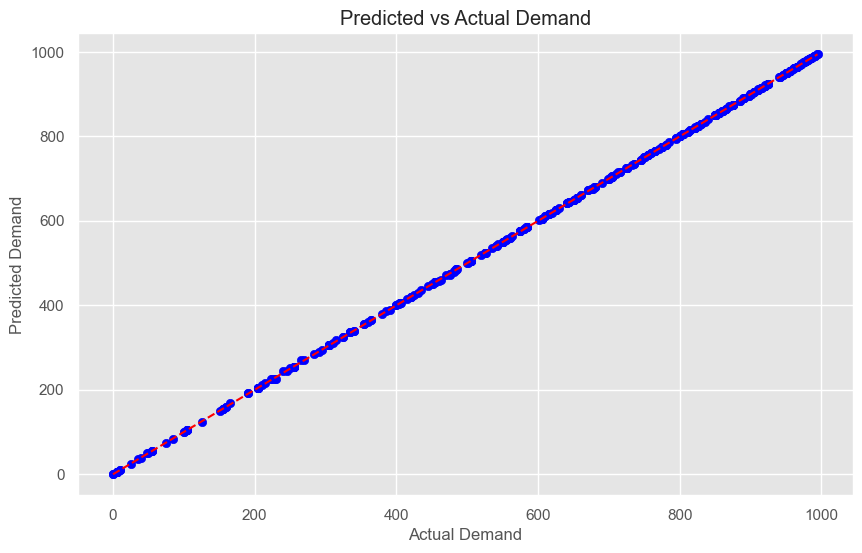

Mean Absolute Error (MAE): 0.2998539553752563
R² Score: 0.9999931630530438


In [483]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have X_test, y_test, and model_demand already defined

# Generate predictions from the model on X_test (make sure you're predicting on the correct dataset)
y_pred = model_demand.predict(X_test)

# Check the length of both arrays
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")

# Ensure y_test and y_pred are of the same length
if len(y_test) == len(y_pred):
    # Plotting the predicted vs actual demand values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title('Predicted vs Actual Demand')
    plt.xlabel('Actual Demand')
    plt.ylabel('Predicted Demand')
    plt.show()

    # Calculate and print error metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}")
else:
    print("Error: The length of y_test and y_pred do not match.")


In [485]:
#What does a diagonal line represent?
#45-degree Line (Diagonal): If the predicted values (y_pred) are exactly equal to the actual values (y_test), all points will lie on this diagonal line. 
#This is the ideal case, and it shows perfect predictions.

In [487]:
#2. Feature Engineering:
# Adding interaction terms between 'price' and 'volume'
df['price_volume_interaction'] = df['price'] * df['volume']

# Adding interaction terms between other features (if necessary)
df['price_depth_interaction'] = df['price'] * df['depth']

# Update features for model training
features = df[['price', 'category_encoded', 'volume', 'depth', 'height', 'price_volume_interaction', 'price_depth_interaction']]


In [489]:
# Creating Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2 as an example)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['price', 'volume', 'depth', 'height']])

# Create a DataFrame with the new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['price', 'volume', 'depth', 'height']))

# Concatenate the polynomial features with the original DataFrame
df = pd.concat([df, poly_features_df], axis=1)

# Update features for model training
features = df[['price', 'category_encoded', 'volume', 'depth', 'height'] + list(poly_features_df.columns)]


In [499]:
# Check the column names in the DataFrame to see if there are nested columns
print(df.columns)

# If 'price' and 'volume' are indeed DataFrames with multiple columns, select the correct sub-column (if applicable)
# For example, if 'price' and 'volume' have multiple sub-columns, use df['price']['sub_column_name']

# Assuming the columns are incorrectly nested, we fix it:
# Let's assume price and volume are stored as multi-level columns, with 'price' and 'volume' being sub-columns.

# Check the first few rows to identify the correct column names
print(df.head())

# Extract 'price' and 'volume' correctly
price_column = df['price'].iloc[:, 0]  # Adjust this to your specific column if needed
volume_column = df['volume'].iloc[:, 0]  # Adjust this to your specific column if needed

# Now, perform the price-to-volume ratio calculation
df['price_to_volume_ratio'] = price_column / volume_column

# Update features for model training
features = df[['price', 'category_encoded', 'volume', 'depth', 'height', 'price_to_volume_ratio']]

# Check the result
print(df[['price', 'volume', 'price_to_volume_ratio']].head())


Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width', 'volume', 'price_diff', 'diff_amount',
       'category_encoded', 'Customer_ID', 'treatment_group', 'sentiment',
       'Cluster', 'designer_encoded', 'demand', 'price_category',
       'price_volume_interaction', 'price_depth_interaction', 'price',
       'volume', 'depth', 'height', 'price^2', 'price volume', 'price depth',
       'price height', 'volume^2', 'volume depth', 'volume height', 'depth^2',
       'depth height', 'height^2'],
      dtype='object')
      item_id       name       category  price  old_price  sellable_online  \
0  90420332.0   FREKVENS  Bar furniture  265.0      265.0              1.0   
1    368814.0  NORDVIKEN  Bar furniture  995.0      995.0              0.0   
3  80155205.0       STIG  Bar furniture   69.0       69.0              1.0   
4  30180504.0    NORBERG  Bar furniture  225.

In [501]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best MAE score from cross-validation
print(f"Best Cross-Validation MAE: {-grid_search.best_score_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation MAE: 0.3355790416733747


In [527]:
import joblib
# Save the best fitted model from grid search
joblib.dump(grid_search.best_estimator_, 'demand_prediction_model.pkl')

['demand_prediction_model.pkl']

In [533]:
import joblib
import pandas as pd

# Load the best fitted model from grid search
loaded_model = joblib.load('demand_prediction_model.pkl')

# Assuming new_data contains the input features (price, category_encoded, volume, etc.)
# Make predictions with the trained model (using the relevant features)
new_predictions = loaded_model.predict(new_data[['price', 'category_encoded', 'volume', 'depth', 'height']])

# Output the predictions
print("Predicted Demand for New Data:")
print(new_predictions)


Predicted Demand for New Data:
[805.         524.695      630.185      694.608      913.745
 913.76       961.27       565.175      693.526      643.92
 979.985      515.185      582.105      885.59541667 901.
 899.975      840.725      733.2755     780.125      847.64
 689.861      920.905      844.955      810.38       765.317
 605.428      890.842      739.0625     700.04       967.62316667
 691.757      905.875      960.0775     525.25       518.925
 593.825      840.75       942.26       655.175      775.025
 930.025      744.555      972.985      544.49808698 863.81533566
 665.325      834.93       734.9975     723.555      899.975
 515.185      611.669      529.25       550.65038313 694.663
 539.465      944.59       894.659      967.64816667 830.325
 800.         857.66371212 584.415      814.782      851.
 724.185      920.905      594.35       954.52       506.31
 611.629      892.694      988.02051273 590.265      643.985
 635.47       611.638      954.52       814.453      

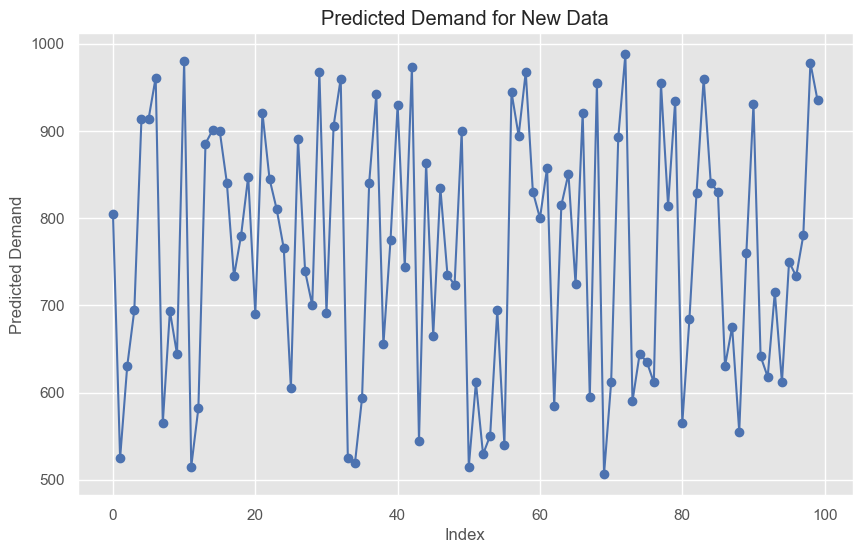

In [539]:
# Plotting the predicted demand values against the index of new_data
plt.figure(figsize=(10, 6))
plt.plot(new_data.index, new_predictions, marker='o', linestyle='-', color='b')
plt.title('Predicted Demand for New Data')
plt.xlabel('Index')
plt.ylabel('Predicted Demand')
plt.grid(True)
plt.show()


In [537]:
# Check the columns in the 'new_data' DataFrame
print(new_data.columns)


Index(['price', 'category_encoded', 'volume', 'depth', 'height'], dtype='object')


In [543]:
# Assuming new_predictions are the predicted demand values
# Create a DataFrame with index and predicted demand
predictions_df = pd.DataFrame({
    'item_id': new_data.index,  # Use the index of new_data as item_id (or create a new ID)
    'predicted_demand': new_predictions
})

# Save the predictions to a CSV file
predictions_df.to_csv('predicted_demand.csv', index=False)

# Print confirmation message
print("Predictions saved to 'predicted_demand.csv'.")


Predictions saved to 'predicted_demand.csv'.


In [545]:
#Business question that can be answered for the above: 
#How can we predict future demand for our products based on their characteristics, so we can optimize inventory, pricing, and overall business strategy?

C:\Users\devar\AppData\Local\Temp\ipykernel_30136\1702621988.py:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



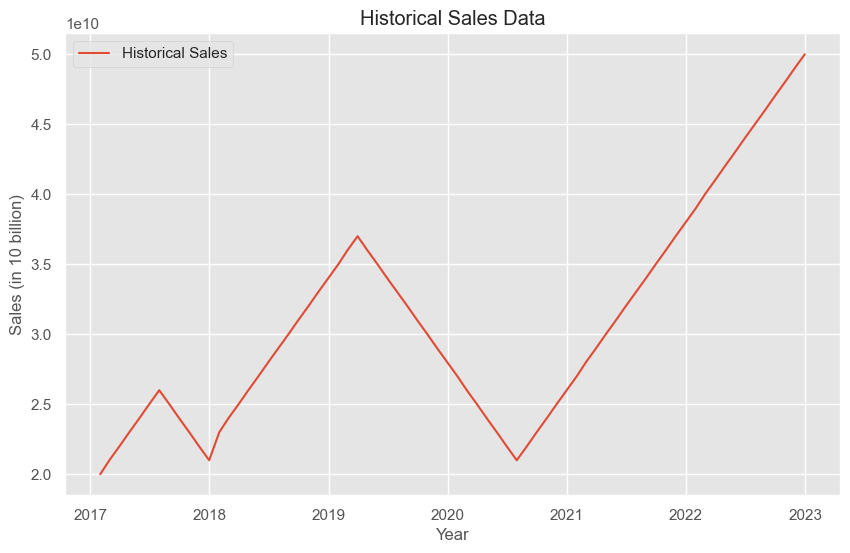

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\devar\AppData\Local\Temp\ipykernel_30136\1702621988.py:42: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



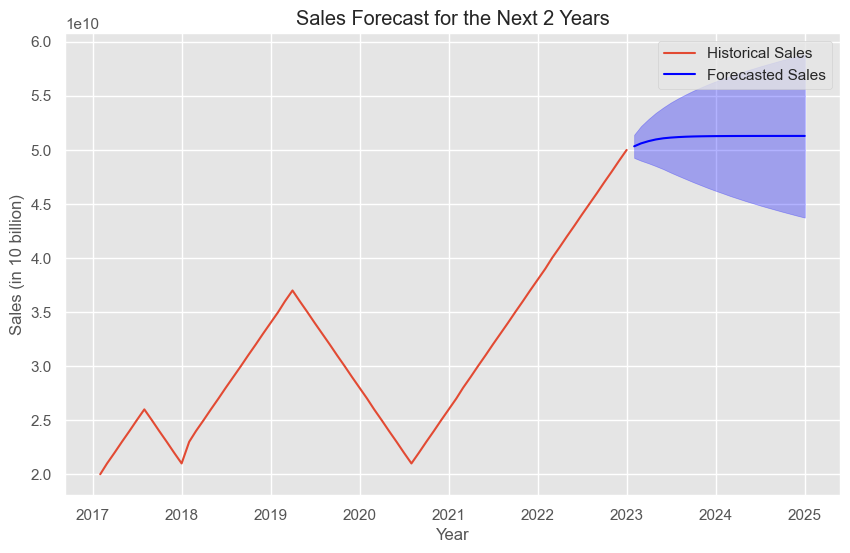

In [573]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Load the IKEA sales data
# For this example, let's assume the sales data is already in a DataFrame named 'ikea_sales'
# The DataFrame should have a 'Date' column and a 'Sales' column

# Example data for illustration purposes
data = {'Date': pd.date_range(start='2017-01-01', periods=72, freq='M'),
        'Sales': [2.0e10, 2.1e10, 2.2e10, 2.3e10, 2.4e10, 2.5e10, 2.6e10, 2.5e10,
                  2.4e10, 2.3e10, 2.2e10, 2.1e10, 2.3e10, 2.4e10, 2.5e10, 2.6e10,
                  2.7e10, 2.8e10, 2.9e10, 3.0e10, 3.1e10, 3.2e10, 3.3e10, 3.4e10,
                  3.5e10, 3.6e10, 3.7e10, 3.6e10, 3.5e10, 3.4e10, 3.3e10, 3.2e10,
                  3.1e10, 3.0e10, 2.9e10, 2.8e10, 2.7e10, 2.6e10, 2.5e10, 2.4e10,
                  2.3e10, 2.2e10, 2.1e10, 2.2e10, 2.3e10, 2.4e10, 2.5e10, 2.6e10,
                  2.7e10, 2.8e10, 2.9e10, 3.0e10, 3.1e10, 3.2e10, 3.3e10, 3.4e10,
                  3.5e10, 3.6e10, 3.7e10, 3.8e10, 3.9e10, 4.0e10, 4.1e10, 4.2e10,
                  4.3e10, 4.4e10, 4.5e10, 4.6e10, 4.7e10, 4.8e10, 4.9e10, 5.0e10]}
ikea_sales = pd.DataFrame(data)
ikea_sales.set_index('Date', inplace=True)

# Plot the historical sales data
plt.figure(figsize=(10, 6))
plt.plot(ikea_sales, label='Historical Sales')
plt.title('Historical Sales Data')
plt.xlabel('Year')
plt.ylabel('Sales (in 10 billion)')
plt.legend()
plt.show()

# Fit an ARIMA model
model = ARIMA(ikea_sales, order=(5, 1, 0))  # Adjust the order parameters as needed
fitted_model = model.fit()

# Forecast the next 2 years (24 months if data is monthly)
forecast_steps = 24
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ikea_sales.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
forecast_conf_int = forecast.conf_int()

# Plot the forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(ikea_sales, label='Historical Sales')
plt.plot(forecast_series, label='Forecasted Sales', color='blue')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='blue', alpha=0.3)
plt.title('Sales Forecast for the Next 2 Years')
plt.xlabel('Year')
plt.ylabel('Sales (in 10 billion)')
plt.legend()
plt.show()

# Print the forecasted values
#print(forecast_series)


C:\Users\devar\AppData\Local\Temp\ipykernel_30136\2969615488.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



ADF Statistic: -5.75753292673591
p-value: 5.773100661177962e-07


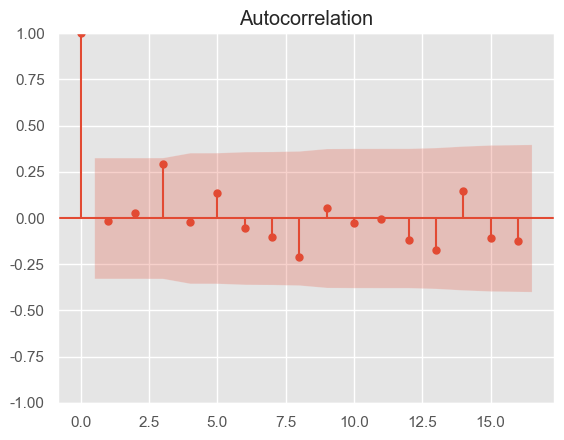

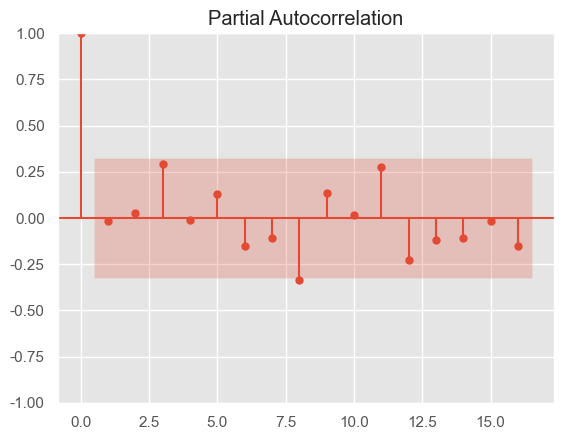

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\devar\AppData\Local\Temp\ipykernel_30136\2969615488.py:49: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



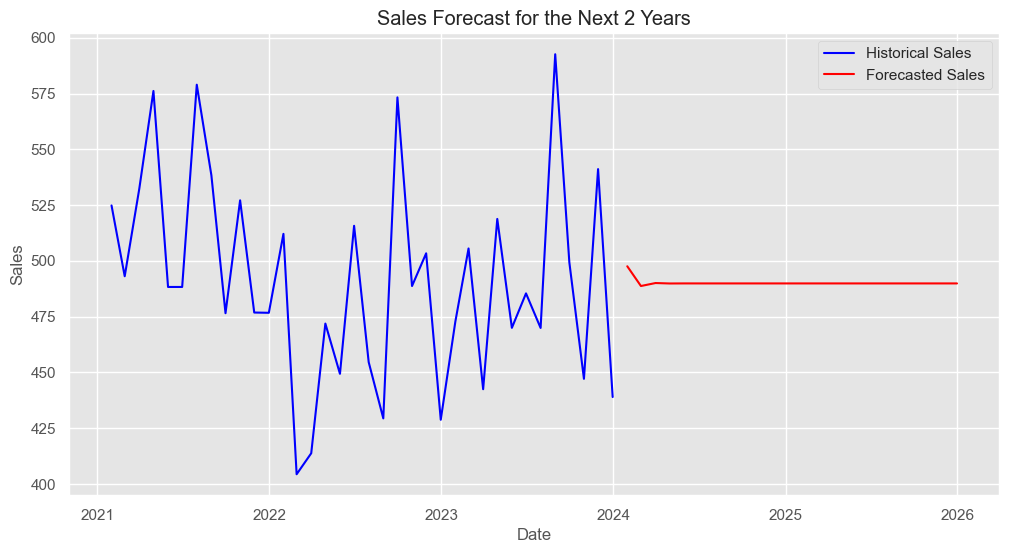

In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime

# Simulating the 'new_data' with 'Sales' data for time series analysis
# Assuming 'new_data' has 'Date' and 'Sales' columns (Sales will be simulated for this example)
# Create a datetime index for the last 3 years (assuming monthly data)
dates = pd.date_range(start='2021-01-01', periods=36, freq='M')

# Simulate sales data (random values for demonstration)
np.random.seed(42)
sales = np.random.normal(loc=500, scale=50, size=36)  # 36 months of sales data

# Create the DataFrame
new_data = pd.DataFrame({'Date': dates, 'Sales': sales})
new_data.set_index('Date', inplace=True)

# Step 1: Check if the data is stationary using Augmented Dickey-Fuller test
result = adfuller(new_data['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value is greater than 0.05, the series is non-stationary
# Apply differencing to make it stationary if needed
if result[1] > 0.05:
    new_data['Sales'] = new_data['Sales'].diff().dropna()

# Step 2: Plot ACF and PACF to determine p, d, q values for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(new_data['Sales'].dropna())
plot_pacf(new_data['Sales'].dropna())
plt.show()

# Based on the plots, choose p, d, q (for demonstration, we assume p=1, d=1, q=1)
p, d, q = 1, 1, 1

# Step 3: Fit ARIMA model
model = ARIMA(new_data['Sales'], order=(p, d, q))
fitted_model = model.fit()

# Step 4: Forecast the next 2 years (24 months)
forecast_periods = 24  # 2 years of monthly data
forecast = fitted_model.forecast(steps=forecast_periods)

# Step 5: Create a time index for the forecasted period
forecast_index = pd.date_range(start=new_data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='M')

# Step 6: Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Forecasted Sales': forecast}, index=forecast_index)

# Step 7: Plot the historical and forecasted sales with different colors
plt.figure(figsize=(12, 6))

# Plot historical sales in blue
plt.plot(new_data.index, new_data['Sales'], label='Historical Sales', color='blue')

# Plot forecasted sales in red
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red')

# Add titles and labels
plt.title('Sales Forecast for the Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Sales')

# Add a legend to differentiate the two lines
plt.legend()

# Display the plot
plt.show()


C:\Users\devar\AppData\Local\Temp\ipykernel_30136\2951351117.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



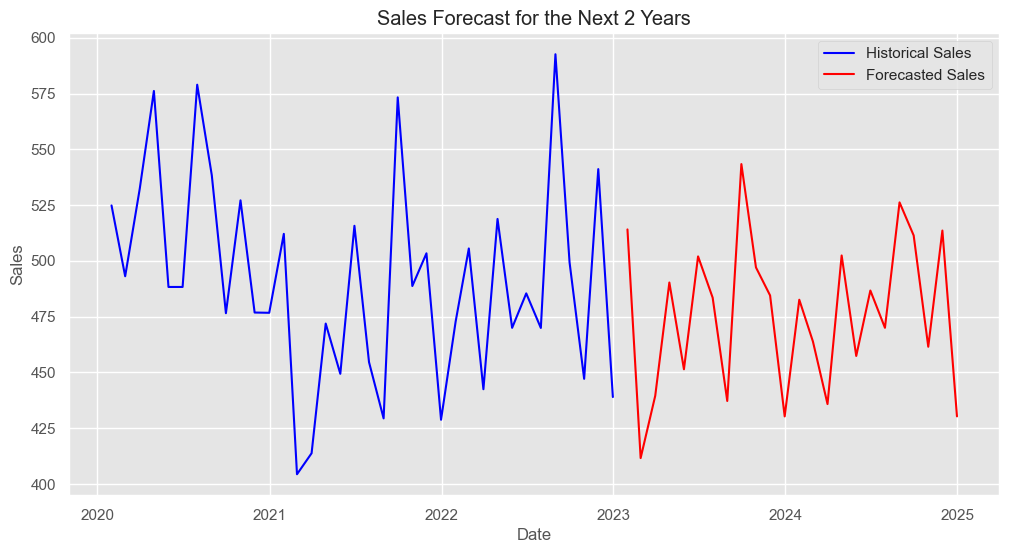

In [569]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Create a Date column assuming monthly frequency (adjust 'start' and 'freq' as needed)
new_data['Date'] = pd.date_range(start='2020-01-01', periods=len(new_data), freq='M')  # Adjust start date if needed

# Set the 'Date' column as the index for time series analysis
new_data.set_index('Date', inplace=True)

# Step 2: Fit a SARIMA model (Seasonal ARIMA model)
# Adjust the seasonal order (seasonal_periods) based on your data
seasonal_order = (1, 1, 1, 12)  # Example: AR(1), differencing(1), MA(1), 12-period seasonality (for monthly data)

sarima_model = SARIMAX(new_data['Sales'], 
                       order=(1, 1, 1),          # ARIMA order (p, d, q)
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()

# Step 3: Forecast the next 2 years (assuming monthly data, so 24 months ahead)
forecast_steps = 24
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Get the forecasted values
forecast_df = forecast.summary_frame()
forecast_df['Forecasted Sales'] = forecast_df['mean']

# Step 4: Plot the historical and forecasted sales with different colors
plt.figure(figsize=(12, 6))

# Plot historical sales in blue
plt.plot(new_data.index, new_data['Sales'], label='Historical Sales', color='blue')

# Plot forecasted sales in red
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red')

# Add titles and labels
plt.title('Sales Forecast for the Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Sales')

# Add a legend to differentiate the two lines
plt.legend()

# Display the plot
plt.show()


In [567]:
new_data.columns

Index(['Sales'], dtype='object')

In [575]:
ikea_sales.columns

Index(['Sales'], dtype='object')

In [577]:
ikea_sales.head()

Sales
Date                    
2017-01-31  2.000000e+10
2017-02-28  2.100000e+10
2017-03-31  2.200000e+10
2017-04-30  2.300000e+10
2017-05-31  2.400000e+10

In [579]:
new_data.head()

Sales
Date                  
2020-01-31  524.835708
2020-02-29  493.086785
2020-03-31  532.384427
2020-04-30  576.151493
2020-05-31  488.292331

In [585]:
# Convert 'Year' column to datetime
df_finance['Year'] = pd.to_datetime(df_finance['Year'], format='%Y')

# Set 'Year' as index
df_finance.set_index('Year', inplace=True)

# Focus on forecasting 'Sales_of_goods'
time_series = df_finance['Sales_of_goods']

# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Sales_of_goods')
plt.title('Sales of Goods Over Time')
plt.xlabel('Year')
plt.ylabel('Sales of Goods')
plt.legend()
plt.show()

# Step 1: Check for stationarity using Augmented Dickey-Fuller test
adf_test = adfuller(time_series)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# If p-value is greater than 0.05, data is non-stationary and needs differencing
if adf_test[1] > 0.05:
    print("Data is non-stationary, applying differencing.")
    time_series_diff = time_series.diff().dropna()
else:
    print("Data is stationary.")

# Plot differenced series if needed
plt.figure(figsize=(10, 6))
plt.plot(time_series_diff, label='Differenced Sales_of_goods')
plt.title('Differenced Sales of Goods')
plt.xlabel('Year')
plt.ylabel('Differenced Sales of Goods')
plt.legend()
plt.show()

# Step 2: Fit an ARIMA model (Use p, d, q from model diagnostics or trial and error)
# For simplicity, we assume (p=1, d=1, q=1) for ARIMA
model = ARIMA(time_series, order=(1, 1, 1))  # (p,d,q)
model_fit = model.fit()

# Forecast the next 2 years (2 time points)
forecast = model_fit.forecast(steps=2)

# Create a range for the next 2 years
forecast_years = pd.date_range(start=time_series.index[-1] + pd.DateOffset(1), periods=2, freq='Y')

# Create a Series to store the forecasted values with appropriate index
forecast_series = pd.Series(forecast, index=forecast_years)

# Output the forecasted values for the next 2 years
print("\nForecasted Sales of Goods for the next 2 years:")
print(forecast_series)

# Plot the original time series and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical Sales_of_goods', color='blue')
plt.plot(forecast_series, label='Forecasted Sales_of_goods', color='red', linestyle='--')
plt.title('Sales of Goods Forecast for the Next 2 Years')
plt.xlabel('Year')
plt.ylabel('Sales of Goods')
plt.legend()
plt.show()

C:\Users\devar\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning:

ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead

C:\Users\devar\anaconda3\Lib\ast.py:587: DeprecationWarning:

Attribute s is deprecated and will be removed in Python 3.14; use value instead

C:\Users\devar\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning:

ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead

C:\Users\devar\anaconda3\Lib\ast.py:587: DeprecationWarning:

Attribute s is deprecated and will be removed in Python 3.14; use value instead



KeyError: 'Year'

In [587]:
df_finance.columns

Index(['Sales_of_goods', 'Franchise_Fees', 'Cost_of_Good_Sold', 'Gross_Profit',
       'Operational_Cost', 'Website_visit', 'Net_Income'],
      dtype='object')

In [589]:
df_finance

Sales_of_goods  Franchise_Fees  Cost_of_Good_Sold  Gross_Profit  \
Year                                                                          
2022-01-01     26148000000      1285000000        23404000000    4174000000   
2021-01-01     24282000000      1273000000        21137000000    4478000000   
2020-01-01     22387000000      1162000000        18860000000    4753000000   
2019-01-01     23916000000      1195000000        20633000000    4551000000   
2018-01-01     23651000000      1200000000        20228000000    4691000000   
2017-01-01     20778000000      1156000000        18688000000    4190000000   

            Operational_Cost  Website_visit  Net_Income  
Year                                                     
2022-01-01        3140000000     4300000000   710000000  
2021-01-01        2622000000     5000000000  1433000000  
2020-01-01        2529000000     4000000000  1731000000  
2019-01-01        2695000000     2800000000  1485000000  
2018-01-01        2729000000     2500000000  1449000000  
2017-01-01        2894000000     2300000000   912000000

            Sales_of_goods  Franchise_Fees  Cost_of_Good_Sold  Gross_Profit  \
Year                                                                          
2022-01-01     26148000000      1285000000        23404000000    4174000000   
2021-01-01     24282000000      1273000000        21137000000    4478000000   
2020-01-01     22387000000      1162000000        18860000000    4753000000   
2019-01-01     23916000000      1195000000        20633000000    4551000000   
2018-01-01     23651000000      1200000000        20228000000    4691000000   

            Operational_Cost  Website_visit  Net_Income  
Year                                                     
2022-01-01        3140000000     4300000000   710000000  
2021-01-01        2622000000     5000000000  1433000000  
2020-01-01        2529000000     4000000000  1731000000  
2019-01-01        2695000000     2800000000  1485000000  
2018-01-01        2729000000     2500000000  1449000000  


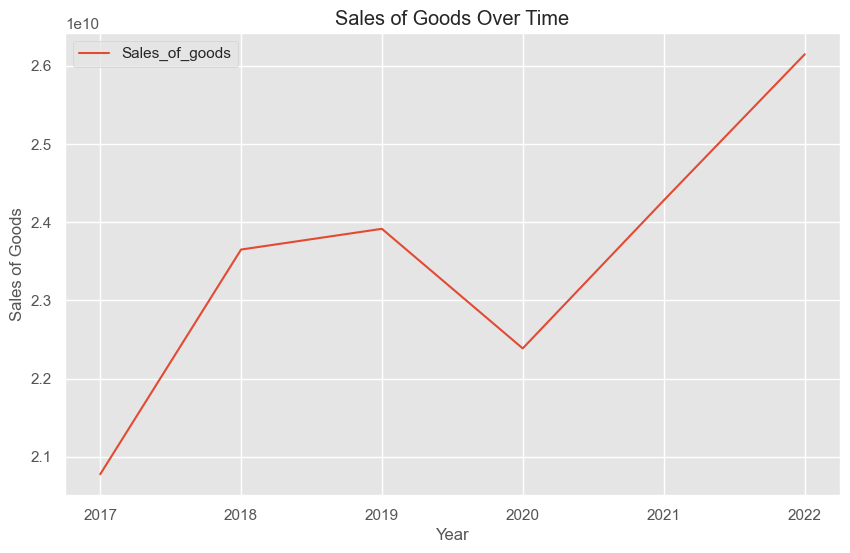

ADF Statistic: -1.2731121436187034
p-value: 0.6413820300233017
Data is non-stationary, applying differencing.


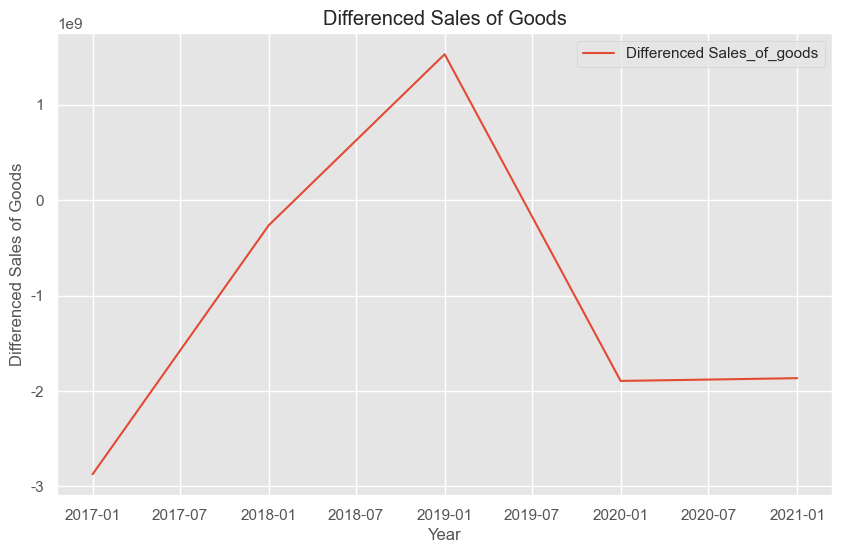

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency -1YS-JAN will be used.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency -1YS-JAN will be used.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency -1YS-JAN will be used.

C:\Users\devar\anaconda3\Lib\site-packages\statsmodels


Forecasted Sales of Goods for the next 2 years:
2017-12-31   NaN
2018-12-31   NaN
Freq: YE-DEC, Name: predicted_mean, dtype: float64


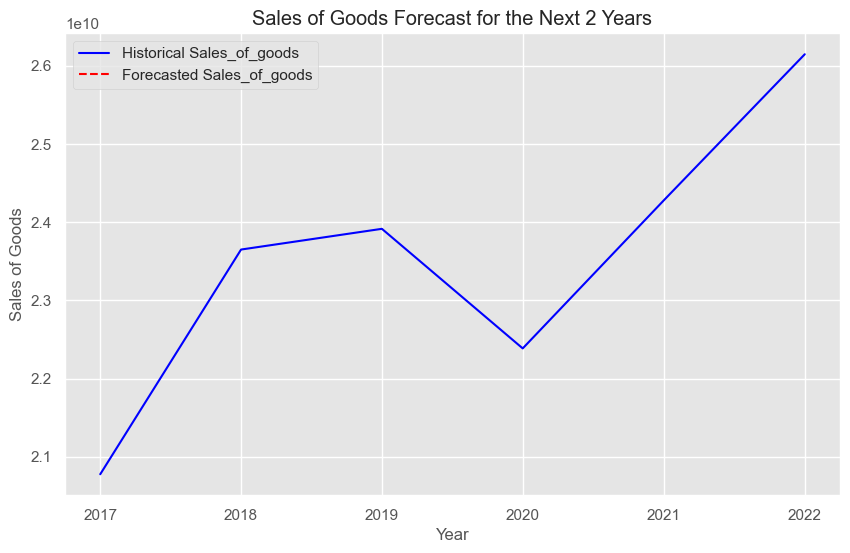

In [597]:
# Ensure that the 'Year' column is the index and is in datetime format
#df_finance['Year'] = pd.to_datetime(df_finance['Year'], format='%Y-%m-%d')
#df_finance.set_index('Year', inplace=True)

# Check the first few rows of the data
print(df_finance.head())

# Focus on forecasting 'Sales_of_goods'
time_series = df_finance['Sales_of_goods']

# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Sales_of_goods')
plt.title('Sales of Goods Over Time')
plt.xlabel('Year')
plt.ylabel('Sales of Goods')
plt.legend()
plt.show()

# Step 1: Check for stationarity using Augmented Dickey-Fuller test
adf_test = adfuller(time_series)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# If p-value is greater than 0.05, data is non-stationary and needs differencing
if adf_test[1] > 0.05:
    print("Data is non-stationary, applying differencing.")
    time_series_diff = time_series.diff().dropna()
else:
    print("Data is stationary.")

# Plot differenced series if needed
plt.figure(figsize=(10, 6))
plt.plot(time_series_diff, label='Differenced Sales_of_goods')
plt.title('Differenced Sales of Goods')
plt.xlabel('Year')
plt.ylabel('Differenced Sales of Goods')
plt.legend()
plt.show()

# Step 2: Fit an ARIMA model (Use p, d, q from model diagnostics or trial and error)
# For simplicity, we assume (p=1, d=1, q=1) for ARIMA
model = ARIMA(time_series, order=(1, 1, 1))  # (p,d,q)
model_fit = model.fit()

# Forecast the next 2 years (2 time points)
forecast = model_fit.forecast(steps=2)

# Create a range for the next 2 years
forecast_years = pd.date_range(start=time_series.index[-1] + pd.DateOffset(1), periods=2, freq='Y')

# Create a Series to store the forecasted values with appropriate index
forecast_series = pd.Series(forecast, index=forecast_years)

# Output the forecasted values for the next 2 years
print("\nForecasted Sales of Goods for the next 2 years:")
print(forecast_series)

# Plot the original time series and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Historical Sales_of_goods', color='blue')
plt.plot(forecast_series, label='Forecasted Sales_of_goods', color='red', linestyle='--')
plt.title('Sales of Goods Forecast for the Next 2 Years')
plt.xlabel('Year')
plt.ylabel('Sales of Goods')
plt.legend()
plt.show()